# Expansión Estratégica de Biogenesys
La empresa farmacéutica BIOGENESYS busca identificar las ubicaciones óptimas para la expansión de laboratorios farmacéuticos, basándose en el análisis de datos de incidencia de COVID-19, tasas de vacunación, y la disponibilidad de infraestructuras sanitarias. La meta es optimizar la respuesta a los efectos de la pandemia y postpandemia con el fin de mejorar el acceso a las vacunas

BIOGENESYS te ha contratado como Data Analyst para que realices un estudio que ayudará en su estrategia de expansión en Latinoamérica específicamente en Colombia, Argentina, Chile, México, Perú y Brasil. Este proyecto es vital para que estén preparados y puedan tener una respuesta rápida ante cualquier situación futura que pueda surgir, la directiva ha propuesto que para poder hacer esta inversión necesitan ubicar regiones y recolectar datos que sean de importancia y que les ayuden a tomar decisiones. Por lo tanto, tú deberás utilizar distintas herramientas vistas en la carrera para poder ayudar a los directivos a tomar decisiones en este proceso

## Objetivos

* Realizar un análisis exploratorio de datos sobre la incidencia de COVID-19 y otros factores relevantes, identificando tendencias y oportunidades mediante estadísticas, mediciones y visualizaciones.

* Aplicar técnicas de limpieza de datos para asegurar la calidad de los datos, facilitando análisis y decisiones estratégicas confiables

* Mejorar el acceso a los datos mediante operaciones eficientes de extracción, transformación y carga (ETL), aumentando la eficacia del análisis y la toma de decisiones

* Desarrollar dashboards interactivos con visualizaciones eficientes, permitiendo explorar datos desde múltiples perspectivas para una toma de decisiones informada y estratégica

# Avance 1

Para el analisis se iniciara cargando algunas librerias que nos ayudaran a realizar el proceso en los datos

In [1]:
# Librerias importadas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Mediante la función read se realiza la lectura de nuestra base de datos a la cual se le asigna la variable data.

In [2]:
# Ruta al archivo CSV

data=pd.read_csv("data_latinoamerica.csv",sep=",")


Para hacer una visualización de los datos, se aplica la funcion head, la cual permite ver los primeros registros de la base de datos.

In [3]:
# Mostrar datos

data.head()

location_key        date country_code country_name  new_confirmed  \
0           AR  2020-01-01           AR    Argentina            3.0   
1           AR  2020-01-02           AR    Argentina           14.0   
2           AR  2020-01-03           AR    Argentina            3.0   
3           AR  2020-01-04           AR    Argentina            7.0   
4           AR  2020-01-05           AR    Argentina            5.0   

   new_deceased  cumulative_confirmed  cumulative_deceased  \
0           0.0                   3.0                  0.0   
1           0.0                  17.0                  0.0   
2           0.0                  20.0                  0.0   
3           0.0                  27.0                  0.0   
4           0.0                  32.0                  0.0   

   cumulative_vaccine_doses_administered  population  ...  \
0                                    NaN  44938712.0  ...   
1                                    NaN  44938712.0  ...   
2                                    NaN  44938712.0  ...   
3                                    NaN  44938712.0  ...   
4                                    NaN  44938712.0  ...   

   population_largest_city  area_rural_sq_km  area_urban_sq_km  \
0               15057273.0         2690269.0           55032.0   
1               15057273.0         2690269.0           55032.0   
2               15057273.0         2690269.0           55032.0   
3               15057273.0         2690269.0           55032.0   
4               15057273.0         2690269.0           55032.0   

   life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
0            76.52                    147.086                       79.483   
1            76.52                    147.086                       79.483   
2            76.52                    147.086                       79.483   
3            76.52                    147.086                       79.483   
4            76.52                    147.086                       79.483   

   pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
0                      26.6                        15.8            NaN   
1                      26.6                        15.8            NaN   
2                      26.6                        15.8            NaN   
3                      26.6                        15.8            NaN   
4                      26.6                        15.8            NaN   

   cumulative_recovered  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  

[5 rows x 50 columns]

Para poder hacer una cuenta de cuantos registros se tienen, se llama la función shape que nos muestra el numero de registros y la cantidad de columnas que la base de datos tiene. Son 12216057 y 50 columnas.

In [4]:
# Comprobar la cantidad de registros

np.shape(data)

(12216057, 50)

El estudio se requiere realizar unicamente con los paises: Colombia, Argentina, Chile, Mexico, Peru y Brasil; por lo tanto se hace una seleccion de dichos paises. Se crea una lista(paises_seleccionados) y una variable llamada data_latinoamerica, la cual nos permite tomar de nuestra data en la columna 'county_name' y realizar un filtro con la función isin de los paises seleccionados.

In [5]:
# Selección de paises donde se expandiran

paises_seleccionados=['Colombia', 'Argentina', 'Chile', 'Mexico', 'Peru','Brazil']
data_latinoamerica=data[data['country_name'].isin(paises_seleccionados)]


Luego de realizar el filtro se puede observar que se tienen ahora 11970289 registros y 50 columnas.

In [6]:
# Numero de datos luego del filtro de paises

np.shape(data_latinoamerica)

(11970289, 50)

Es importante realizar una limpieza de la base de datos ya que de esto depende que el analisis sea claro conciso y veraz, lo primero que se debe saber es si existen datos nulos, por ello nos vamos a ayudar mediante la funcion isnull la cual identificara los datos nulos y la funcion sum que nos da un total de estos datos que encuentre en cada columna.

Estos resultados nos muestra un numero bastante alto de datos nulos se puede decir que hay un numero de entre 400000 y 7000000. Habria que mirar el porque de la cantidad ya que son bastantes.

In [7]:
# Datos nulos de nuestra base de datos

data_latinoamerica.isnull().sum()[data_latinoamerica.isnull().sum()>400000]



new_confirmed                             5620283
new_deceased                              5661788
cumulative_confirmed                      5619937
cumulative_deceased                       5661426
cumulative_vaccine_doses_administered    11706131
population                                 521266
population_male                           1122803
population_female                         1122803
population_rural                         11964343
population_urban                         11964343
population_density                       11964343
human_development_index                   6472221
population_age_00_09                      1465689
population_age_10_19                      1465689
population_age_20_29                      1465689
population_age_30_39                      1465689
population_age_40_49                      1465689
population_age_50_59                      1465689
population_age_60_69                      1465689
population_age_70_79                      1465689


Para saber si se esta realizando el filtro con la columna correcta, se realizo un conteo de los registros de la columna location_key, donde se puede ver que hay localizaciones especificas dentro de un país y se observa que se esta repitiendo información para todos los paises. Esto quiere decir que el filtro con la columna county_name me muestra información repetida.

In [8]:
data_latinoamerica.location_key.value_counts()

location_key
AR              991
MX_GRO_12040    991
MX_GRO_12031    991
MX_GRO_12032    991
MX_GRO_12033    991
               ... 
BR_PR_411880    991
BR_PR_411885    991
BR_PR_411890    991
BR_PR_411900    991
PE_UCA_0401     991
Name: count, Length: 12079, dtype: int64

Por lo anterior se vuelve a realizar el filtro con la columna 'location_key' y se puede observar que ahora los registros disminuyeron notablemente ahora se tiene 5946 y 50 columnas.

In [9]:
# Se filtra los paises latinoamericanos mediante la columna 'location_key'

data_latinoamerica_paises=data_latinoamerica[data_latinoamerica['location_key'].isin(['CO', 'AR', 'CL', 'MX', 'PE','BR'])]
data_latinoamerica_paises.shape


(5946, 50)

Tambien se pide que se realice un filtro con los datos en fechas mayores a 2021-01-01

In [10]:
# Filtra los datos en fechas mayores a 2021-01-01

data_latinoamerica_paises_fecha = data_latinoamerica_paises[data_latinoamerica['date'] > '2021-01-01']


C:\Users\GSR AUTOS\AppData\Local\Temp\ipykernel_18296\4028202760.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_latinoamerica_paises_fecha = data_latinoamerica_paises[data_latinoamerica['date'] > '2021-01-01']


Luego de realizar este filtro vemos que ahora se tienen 3744 registros y 50 columnas

In [11]:
# Comprobacion de cuantos registros 

data_latinoamerica_paises_fecha.shape

(3744, 50)

Una vez realizado este ultimo filtro se realiza nuevamente un conteo de los valores nulos, vemos que la cantidad de valores nulos es mucho mas considerable que el que nos aparecia al inicio cuando se realizo el filtro por paises.

In [13]:
# Conteo de valores nulos

valores_nulos_fecha=data_latinoamerica_paises_fecha.isnull().sum()[data_latinoamerica_paises_fecha.isnull().sum()>0]
print(valores_nulos_fecha)
print(np.shape(data_latinoamerica_paises_fecha))

new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
average_temperature_celsius                42
minimum_temperature_celsius                41
maximum_temperature_celsius                41
rainfall_mm                                90
relative_humidity                          42
new_recovered                            2116
cumulative_recovered                     2736
dtype: int64
(3744, 50)


Una de las desiciones que fueron planteadas para reemplazar estos datos nulos fue con el promedio para algunas de las columnas, esto porque se toma el valor que prevalece y no generaria tantas diferencias cuando se realice el analisis.


In [14]:
columnas_especificas = [
    'new_confirmed', 'new_deceased', 
    'average_temperature_celsius', 'minimum_temperature_celsius', 'maximum_temperature_celsius',
    'rainfall_mm', 'relative_humidity'
]

In [15]:
for pais in paises_seleccionados:
    # Filtrar los datos por país
    df_pais = data_latinoamerica_paises_fecha[data_latinoamerica_paises_fecha['country_name'] == pais]
    
    # Iterar sobre cada columna
    for col in columnas_especificas:
        # Reemplazar valores nulos con el promedio de la columna para ese país
        if df_pais[col].isnull().sum() > 0:  # Verificar si hay valores nulos
            mean_value = df_pais[col].mean()
            data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha['country_name'] == pais, col] = data_latinoamerica_paises_fecha.loc[data_latinoamerica_paises_fecha['country_name'] == pais, col].fillna(mean_value)

Se verifica que estos datos hallan sido reemplazados.

In [16]:
print(data_latinoamerica_paises_fecha.isnull().sum()[data_latinoamerica_paises_fecha.isnull().sum()>0])
print(np.shape(data_latinoamerica_paises_fecha))

cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
new_recovered                            2116
cumulative_recovered                     2736
dtype: int64
(3744, 50)


In [17]:
data_latinoamerica_paises_fecha['new_recovered']=data_latinoamerica_paises_fecha['new_recovered'].fillna(0)
#data_latinoamerica_paises_fecha['cumulative_recovered']=data_latinoamerica_paises_fecha['cumulative_recovered'].fillna(0)
#data_latinoamerica_paises_fecha['cumulative_vaccine_doses_administered']=data_latinoamerica_paises_fecha['cumulative_vaccine_doses_administered'].fillna(0)


C:\Users\GSR AUTOS\AppData\Local\Temp\ipykernel_18296\2108684059.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_paises_fecha['new_recovered']=data_latinoamerica_paises_fecha['new_recovered'].fillna(0)


In [18]:
print(data_latinoamerica_paises_fecha.isnull().sum()[data_latinoamerica_paises_fecha.isnull().sum()>0])
print(np.shape(data_latinoamerica_paises_fecha))

cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
cumulative_recovered                     2736
dtype: int64
(3744, 50)


In [19]:
# Lista de columnas a procesar
columnas_cumulative = [
    'cumulative_confirmed', 
    'cumulative_deceased',
    'cumulative_vaccine_doses_administered',
    'cumulative_recovered' 
]

# Iterar sobre cada país seleccionado
for pais in paises_seleccionados:
    # Filtrar los datos por país
    mask = data_latinoamerica_paises_fecha['country_name'] == pais
    
    # Reemplazar valores nulos en cada columna especificada con el valor anterior (forward fill)
    for col in columnas_cumulative:
        data_latinoamerica_paises_fecha.loc[mask, col] = data_latinoamerica_paises_fecha.loc[mask, col].fillna(method='ffill')



C:\Users\GSR AUTOS\AppData\Local\Temp\ipykernel_18296\1312973097.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_latinoamerica_paises_fecha.loc[mask, col] = data_latinoamerica_paises_fecha.loc[mask, col].fillna(method='ffill')
C:\Users\GSR AUTOS\AppData\Local\Temp\ipykernel_18296\1312973097.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_latinoamerica_paises_fecha.loc[mask, col] = data_latinoamerica_paises_fecha.loc[mask, col].fillna(method='ffill')
C:\Users\GSR AUTOS\AppData\Local\Temp\ipykernel_18296\1312973097.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_latinoamerica_paises_fecha.loc[mask, col] = data_latinoamerica_paises_fecha.loc[mask, col].fillna(method='ffill')
C:\Users\GSR AUTOS\App

In [20]:
print(data_latinoamerica_paises_fecha.isnull().sum()[data_latinoamerica_paises_fecha.isnull().sum()>0])
print(np.shape(data_latinoamerica_paises_fecha))

cumulative_vaccine_doses_administered     103
cumulative_recovered                     2496
dtype: int64
(3744, 50)


In [21]:
data_latinoamerica_paises_fecha['cumulative_vaccine_doses_administered']=data_latinoamerica_paises_fecha['cumulative_vaccine_doses_administered'].fillna(0)
data_latinoamerica_paises_fecha['cumulative_recovered']=data_latinoamerica_paises_fecha['cumulative_recovered'].fillna(0)

C:\Users\GSR AUTOS\AppData\Local\Temp\ipykernel_18296\844676631.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_paises_fecha['cumulative_vaccine_doses_administered']=data_latinoamerica_paises_fecha['cumulative_vaccine_doses_administered'].fillna(0)
C:\Users\GSR AUTOS\AppData\Local\Temp\ipykernel_18296\844676631.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_paises_fecha['cumulative_recovered']=data_latinoamerica_paises_fecha['cumulative_recovered'].fillna(0)


In [22]:
print(data_latinoamerica_paises_fecha.isnull().sum()[data_latinoamerica_paises_fecha.isnull().sum()>0])
print(np.shape(data_latinoamerica_paises_fecha))

Series([], dtype: int64)
(3744, 50)


In [71]:
data_latinoamerica_paises_fecha.info()

NameError: name 'data_latinoamerica_paises_fecha' is not defined

In [23]:
columns_to_convert = [
    'new_confirmed', 'new_deceased', 'cumulative_confirmed', 'cumulative_deceased',
    'cumulative_vaccine_doses_administered', 'population', 'population_male',
    'population_female', 'population_rural', 'population_urban',
    'population_age_00_09', 'population_age_20_29', 'population_age_30_39',
    'population_age_40_49', 'population_age_50_59', 'population_age_60_69',
    'population_age_70_79', 'population_age_80_and_older', 'gdp_per_capita_usd',
    'area_sq_km', 'population_largest_city', 'area_rural_sq_km',
    'area_urban_sq_km', 'new_recovered', 'cumulative_recovered'
]

for column in columns_to_convert:
    data_latinoamerica_paises_fecha[column] = data_latinoamerica_paises_fecha[column].astype('int')



C:\Users\GSR AUTOS\AppData\Local\Temp\ipykernel_18296\2650862577.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_paises_fecha[column] = data_latinoamerica_paises_fecha[column].astype('int')
C:\Users\GSR AUTOS\AppData\Local\Temp\ipykernel_18296\2650862577.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_paises_fecha[column] = data_latinoamerica_paises_fecha[column].astype('int')
C:\Users\GSR AUTOS\AppData\Local\Temp\ipykernel_18296\2650862577.py:13: SettingWithC

Se guarda la base de datos con los cambios realizados para asi poder manejar mucho mejor el dataset ya filtrado y de esta manera no es necesario cargar el archivo original. El archivo ahora es mas pequeño.

In [24]:
# Guarda los datos filtrados en un archivo con el nombre DatosFinalesFiltrado.csv 

path_nuevo_csv = 'DatosFinalesFiltrado.csv'

data_latinoamerica_paises_fecha.to_csv(path_nuevo_csv, index=False)



# Datos finales filtrado

In [88]:
# Lectura de los datos

data_latinoamerica_paises = pd.read_csv('DatosFinalesFiltrado.csv')

In [89]:
data_latinoamerica_paises.describe()


new_confirmed  new_deceased  cumulative_confirmed  cumulative_deceased  \
count    3744.000000   3744.000000          3.744000e+03          3744.000000   
mean    13921.906784    276.885417          6.793569e+06        193024.770299   
std     24219.361428    507.240047          8.005067e+06        182997.039494   
min      -573.000000      0.000000          9.710000e+02             1.000000   
25%      1536.750000     26.000000          2.132216e+06         59293.000000   
50%      5214.000000    100.500000          3.643377e+06        139628.500000   
75%     14834.000000    312.000000          6.247634e+06        215171.500000   
max    298408.000000  11447.000000          3.456883e+07        685203.000000   

       cumulative_vaccine_doses_administered    population  population_male  \
count                           3.744000e+03  3.744000e+03     3.744000e+03   
mean                            8.082799e+07  7.772147e+07     3.787035e+07   
std                             9.354879e+07  6.713776e+07     3.318494e+07   
min                             0.000000e+00  1.757400e+07     8.972014e+06   
25%                             1.618311e+07  2.938188e+07     1.445076e+07   
50%                             4.778491e+07  4.791080e+07     2.225416e+07   
75%                             9.443991e+07  1.109920e+08     5.485523e+07   
max                             3.478685e+08  2.125594e+08     1.044358e+08   

       population_female  population_rural  population_urban  ...  \
count       3.744000e+03      3.744000e+03      3.744000e+03  ...   
mean        3.927162e+07      1.255498e+07      6.833931e+07  ...   
std         3.448407e+07      1.008074e+07      5.829529e+07  ...   
min         8.601989e+06      2.341903e+06      1.661014e+07  ...   
25%         1.493113e+07      3.599141e+06      2.539034e+07  ...   
50%         2.324582e+07      8.316128e+06      4.108344e+07  ...   
75%         5.748131e+07      2.494867e+07      1.026269e+08  ...   
max         1.081236e+08      2.780789e+07      1.832416e+08  ...   

       population_largest_city  area_rural_sq_km  area_urban_sq_km  \
count             3.744000e+03      3.744000e+03       3744.000000   
mean              1.443888e+07      2.636580e+06      59502.500000   
std               5.710077e+06      2.584740e+06      45125.320206   
min               6.723516e+06      7.094180e+05      12027.000000   
25%               1.055471e+07      1.090598e+06      16425.000000   
50%               1.291832e+07      1.543881e+06      45582.000000   
75%               2.167191e+07      2.690269e+06     102418.000000   
max               2.184651e+07      8.241430e+06     134981.000000   

       life_expectancy  adult_male_mortality_rate  \
count      3744.000000                3744.000000   
mean         76.808500                 154.274667   
std           1.597394                  27.000146   
min          74.992000                 107.669000   
25%          75.672000                 146.370000   
50%          76.518000                 149.351000   
75%          77.109000                 184.379000   
max          80.042000                 188.528000   

       adult_female_mortality_rate  pollution_mortality_rate  \
count                  3744.000000               3744.000000   
mean                     81.428000                 36.566667   
std                      11.800623                 13.027569   
min                      59.035000                 25.300000   
25%                      77.999000                 26.600000   
50%                      82.149000                 33.300000   
75%                      91.421000                 37.000000   
max                      95.815000                 63.900000   

       comorbidity_mortality_rate  new_recovered  cumulative_recovered  
count                 3744.000000    3744.000000          3.744000e+03  
mean                    14.816667    8263.612179          4.265799e+06  
std                      1.665972   23

In [90]:
data_latinoamerica_paises['new_confirmed'] = data_latinoamerica_paises['new_confirmed'].abs()
data_latinoamerica_paises['new_recovered'] = data_latinoamerica_paises['new_recovered'].abs()

Se pide un bucle for para el calculo de estadisticas descriptivas:

Aqui se puede observar que hay un conteo de registros de 3744, se seleccionaron 6 paises, y el pais que tiene la mayor cantidad de registros es Argentina, las variables numericas muestran la desviacion estandar, media, valor min y max.

In [91]:
for i in data_latinoamerica_paises.columns:
    print(i)
    print(data_latinoamerica_paises[i].describe())
    print('______________________________________')

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
______________________________________
date
count           3744
unique           624
top       2021-01-02
freq               6
Name: date, dtype: object
______________________________________
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
______________________________________
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
______________________________________
new_confirmed
count      3744.000000
mean      13922.212874
std       24219.185430
min           0.000000
25%        1536.750000
50%        5214.000000
75%       14834.000000
max      298408.000000
Name: new_confirmed, dtype: float64
______________________________________
new_deceased
count     3744.000000
mean       276.885417
std        507.240047
min          0.000000
25%         26

Crea una función que permita obtener la mediana, varianza y el rango. 
Esta funcion permite ver en cada columna; el dato medio el rango de los datos y la moda de nuestros datos


In [92]:
def describir_datos(data): #recorre cada columna del conjunto de datos
    for i in data.columns:  
        if data[i].dtype == 'float64' or data[i].dtype == 'int64':# si el numero es decimal o entero
            print(i)
            print('Mediana:', data[i].median())#imprime mediana
            print('Varianza:', data[i].var())#imprime varianza
            print('Rango:', data[i].max() - data[i].min())#imprime rango
            print('Moda:', data[i].mode())#imprime moda
            print('_______________________________')

describir_datos(data_latinoamerica_paises)



new_confirmed
Mediana: 5214.0
Varianza: 586568942.8921559
Rango: 298408
Moda: 0    0
Name: new_confirmed, dtype: int64
_______________________________
new_deceased
Mediana: 100.5
Varianza: 257292.46482600857
Rango: 11447
Moda: 0    0
Name: new_deceased, dtype: int64
_______________________________
cumulative_confirmed
Mediana: 3643377.0
Varianza: 64081091330927.14
Rango: 34567862
Moda: 0    6304317
Name: cumulative_confirmed, dtype: int64
_______________________________
cumulative_deceased
Mediana: 139628.5
Varianza: 33487916463.656017
Rango: 685202
Moda: 0    141708
Name: cumulative_deceased, dtype: int64
_______________________________
cumulative_vaccine_doses_administered
Mediana: 47784908.0
Varianza: 8751375229164421.0
Rango: 347868481
Moda: 0    0
Name: cumulative_vaccine_doses_administered, dtype: int64
_______________________________
population
Mediana: 47910798.0
Varianza: 4507478439615793.0
Rango: 194985406
Moda: 0     17574003
1     29381884
2     44938712
3     50882884
4   

Aqui se hace el cambio del tioo de dato de fecha a datetime

In [93]:
# Transformar tipo de dato object a date_time en la columna date

data_latinoamerica_paises['date']=pd.to_datetime(data_latinoamerica_paises['date'])
data_latinoamerica_paises.set_index('date', inplace = True)

In [94]:
data_latinoamerica_paises.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3744 entries, 2021-01-02 to 2022-09-17
Data columns (total 49 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   location_key                           3744 non-null   object 
 1   country_code                           3744 non-null   object 
 2   country_name                           3744 non-null   object 
 3   new_confirmed                          3744 non-null   int64  
 4   new_deceased                           3744 non-null   int64  
 5   cumulative_confirmed                   3744 non-null   int64  
 6   cumulative_deceased                    3744 non-null   int64  
 7   cumulative_vaccine_doses_administered  3744 non-null   int64  
 8   population                             3744 non-null   int64  
 9   population_male                        3744 non-null   int64  
 10  population_female                      3744 non-null  

# Avance 2

Se exploran las medidas de tendencia central de nuestro conjunto de datos

In [95]:
data_latinoamerica_paises.describe()

new_confirmed  new_deceased  cumulative_confirmed  cumulative_deceased  \
count    3744.000000   3744.000000          3.744000e+03          3744.000000   
mean    13922.212874    276.885417          6.793569e+06        193024.770299   
std     24219.185430    507.240047          8.005067e+06        182997.039494   
min         0.000000      0.000000          9.710000e+02             1.000000   
25%      1536.750000     26.000000          2.132216e+06         59293.000000   
50%      5214.000000    100.500000          3.643377e+06        139628.500000   
75%     14834.000000    312.000000          6.247634e+06        215171.500000   
max    298408.000000  11447.000000          3.456883e+07        685203.000000   

       cumulative_vaccine_doses_administered    population  population_male  \
count                           3.744000e+03  3.744000e+03     3.744000e+03   
mean                            8.082799e+07  7.772147e+07     3.787035e+07   
std                             9.354879e+07  6.713776e+07     3.318494e+07   
min                             0.000000e+00  1.757400e+07     8.972014e+06   
25%                             1.618311e+07  2.938188e+07     1.445076e+07   
50%                             4.778491e+07  4.791080e+07     2.225416e+07   
75%                             9.443991e+07  1.109920e+08     5.485523e+07   
max                             3.478685e+08  2.125594e+08     1.044358e+08   

       population_female  population_rural  population_urban  ...  \
count       3.744000e+03      3.744000e+03      3.744000e+03  ...   
mean        3.927162e+07      1.255498e+07      6.833931e+07  ...   
std         3.448407e+07      1.008074e+07      5.829529e+07  ...   
min         8.601989e+06      2.341903e+06      1.661014e+07  ...   
25%         1.493113e+07      3.599141e+06      2.539034e+07  ...   
50%         2.324582e+07      8.316128e+06      4.108344e+07  ...   
75%         5.748131e+07      2.494867e+07      1.026269e+08  ...   
max         1.081236e+08      2.780789e+07      1.832416e+08  ...   

       population_largest_city  area_rural_sq_km  area_urban_sq_km  \
count             3.744000e+03      3.744000e+03       3744.000000   
mean              1.443888e+07      2.636580e+06      59502.500000   
std               5.710077e+06      2.584740e+06      45125.320206   
min               6.723516e+06      7.094180e+05      12027.000000   
25%               1.055471e+07      1.090598e+06      16425.000000   
50%               1.291832e+07      1.543881e+06      45582.000000   
75%               2.167191e+07      2.690269e+06     102418.000000   
max               2.184651e+07      8.241430e+06     134981.000000   

       life_expectancy  adult_male_mortality_rate  \
count      3744.000000                3744.000000   
mean         76.808500                 154.274667   
std           1.597394                  27.000146   
min          74.992000                 107.669000   
25%          75.672000                 146.370000   
50%          76.518000                 149.351000   
75%          77.109000                 184.379000   
max          80.042000                 188.528000   

       adult_female_mortality_rate  pollution_mortality_rate  \
count                  3744.000000               3744.000000   
mean                     81.428000                 36.566667   
std                      11.800623                 13.027569   
min                      59.035000                 25.300000   
25%                      77.999000                 26.600000   
50%                      82.149000                 33.300000   
75%                      91.421000                 37.000000   
max                      95.815000                 63.900000   

       comorbidity_mortality_rate  new_recovered  cumulative_recovered  
count                 3744.000000    3744.000000          3.744000e+03  
mean                    14.816667    8348.282585          4.265799e+06  
std                      1.665972   23

A continuacion se realiza  una matriz de correlación para ver que tan fuerte es la relación entre las variables.

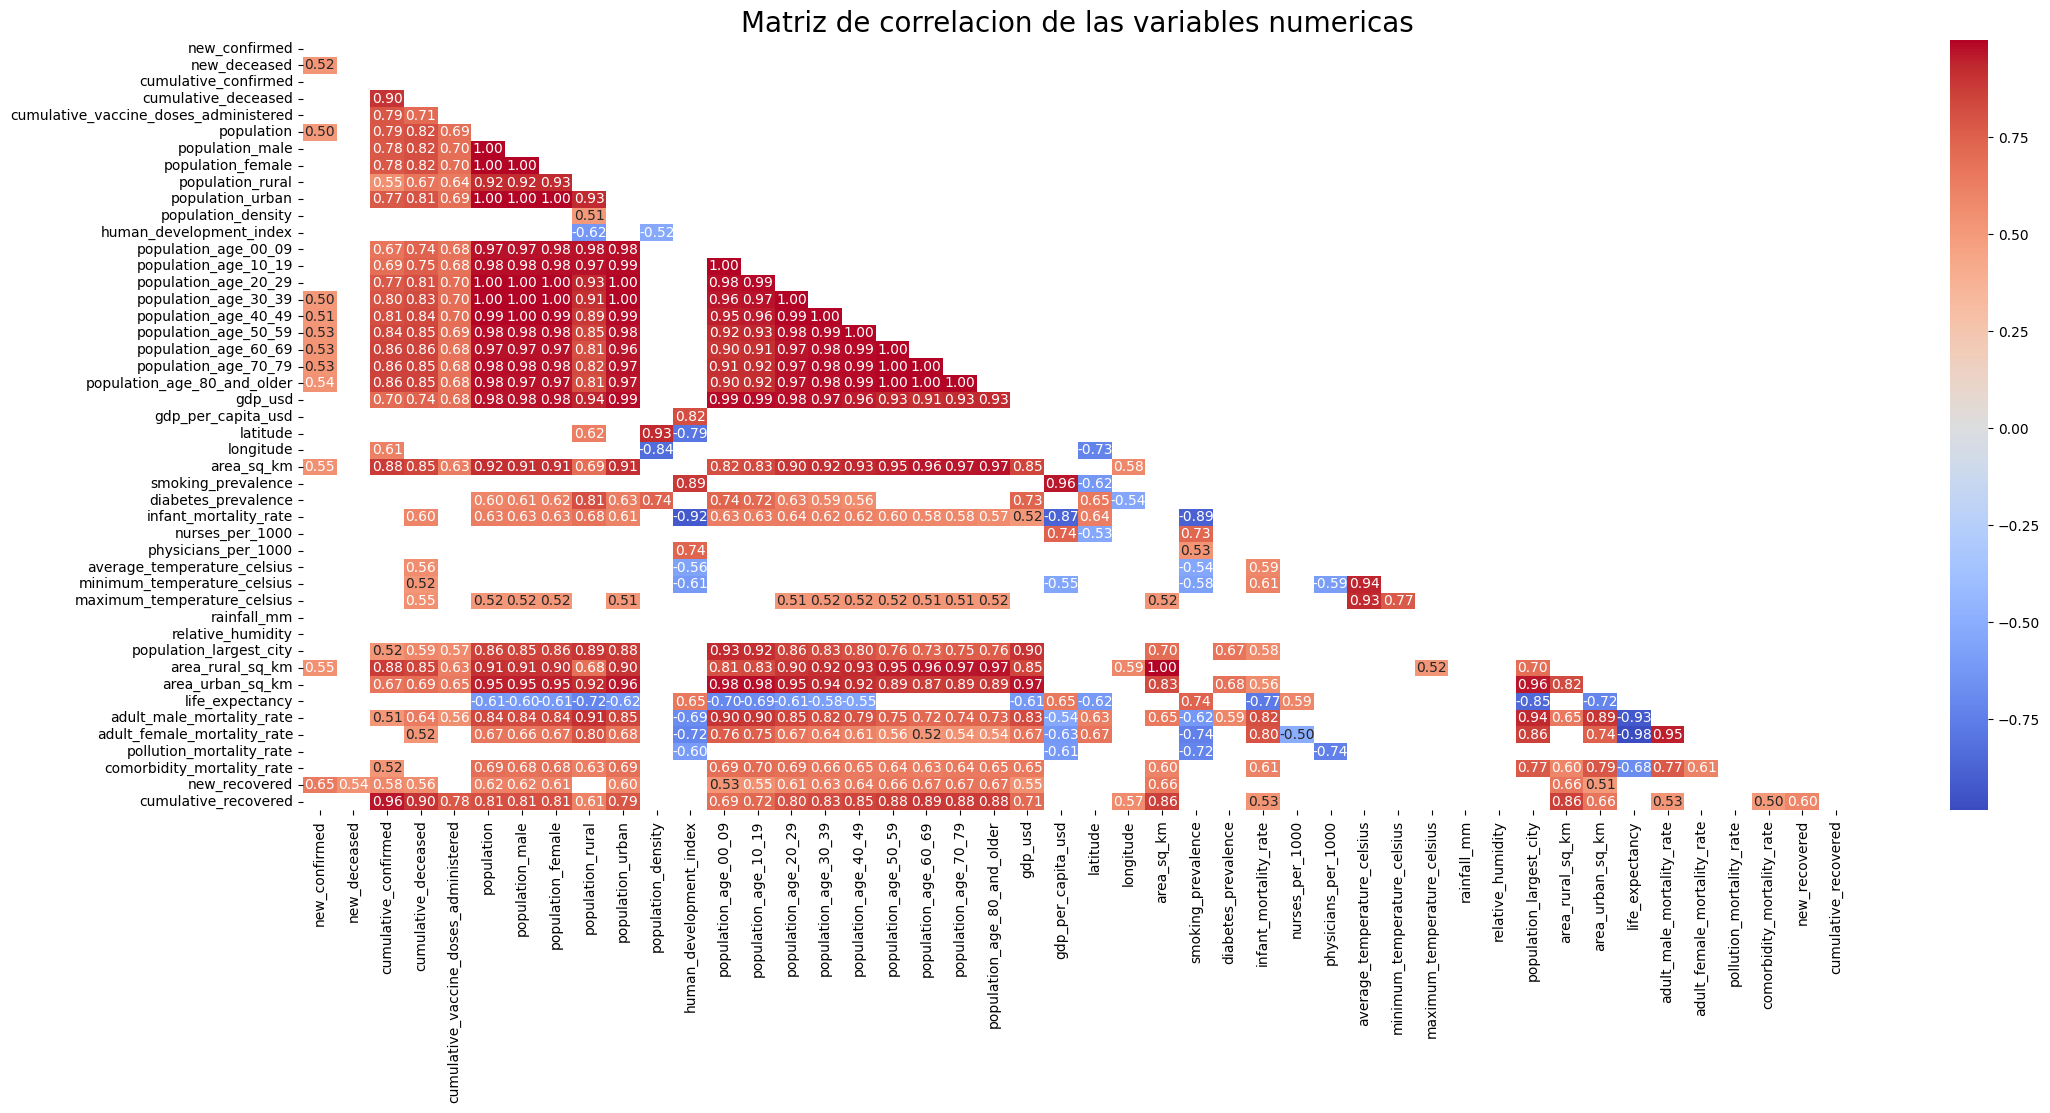

In [96]:
numeric_columns = data_latinoamerica_paises.select_dtypes(include=["float64", "int64"]).columns#selecciona las variables numeicas y que guarde esas columnas
correlacio_matrix=data_latinoamerica_paises[numeric_columns].corr()#hace una correlacion con las valriables numericas
### se crea mascara para triangulo superior para que muestre solo la mitad de los datos
mask= np.triu(np.ones_like(correlacio_matrix,dtype=bool))
### valores superiores a 0.5 donde hay una correlacion fuerte
correlacio_matrix=correlacio_matrix[abs(correlacio_matrix)>abs(0.5)]
##Graficamos
plt.figure(figsize=(25,10))#Definir la figura
heatmap=sns.heatmap(correlacio_matrix,mask=mask,annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Matriz de correlacion de las variables numericas",fontsize=20)
plt.show()


En el gráfico anterior se presentan las variables con mayor correlación, se define que se muestren los valores absolutos mayores a 0.5 y se grafiquen en un heatmap.

Se tiene una idea de las variables que tienen mayor correlación, asi se puede hacer un analisis mas detallado, se podria hacer en un analisis posterior con la cración de un modelo ML

A continuación se realiza una revisión gráfica de la mayoria de las columnas y ver como se comportan los datos.

**Gráficos de barras de países contra el resto de variables*

Por medio de los siguientes graficos de barras se puede observar como se comportan los datos con algunas variables para cada uno de los paises.

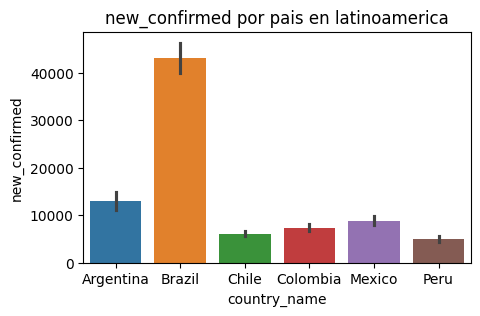

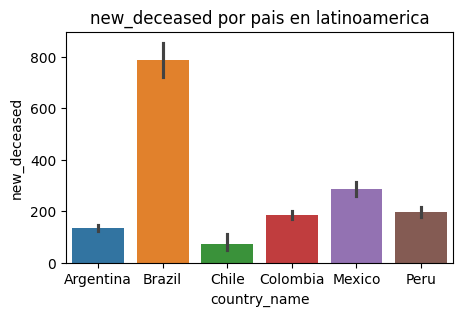

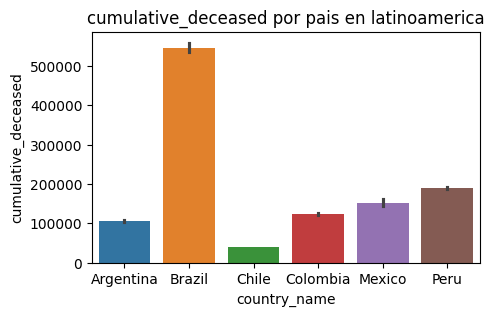

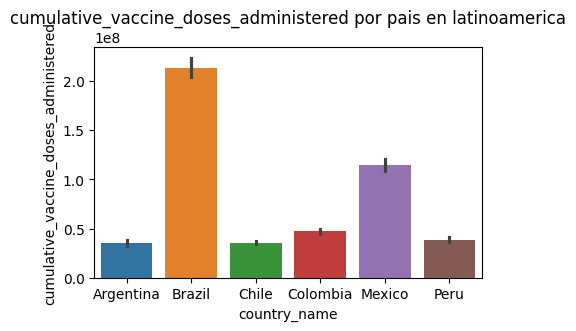

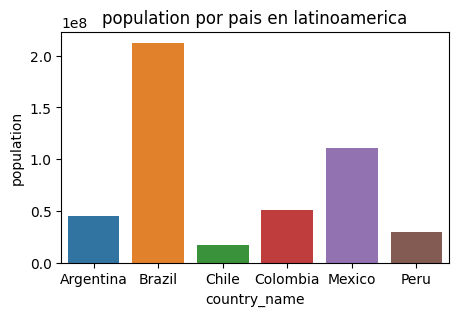

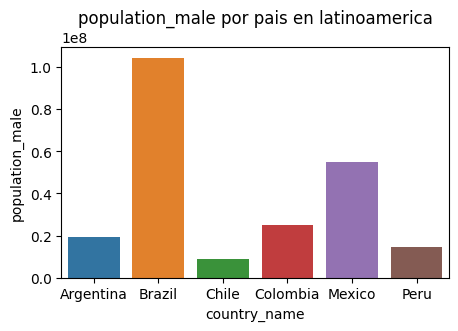

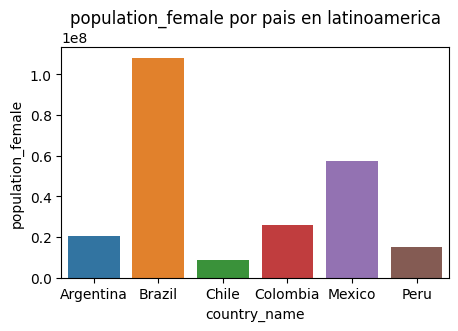

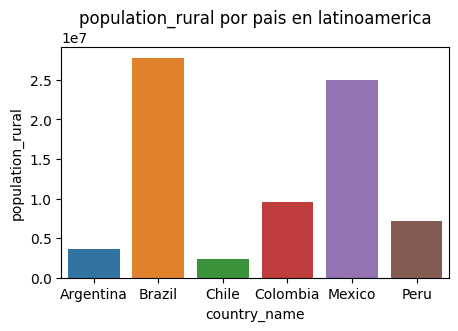

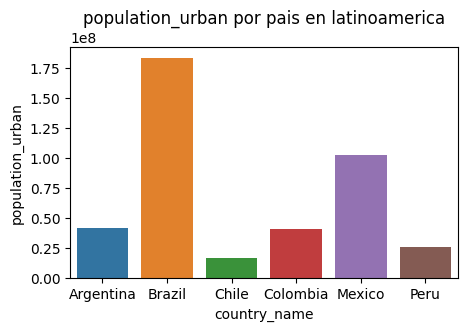

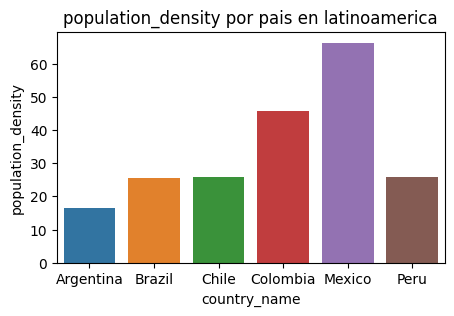

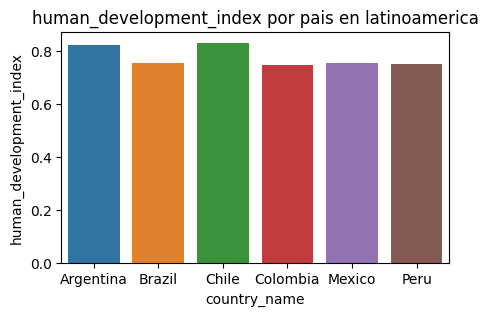

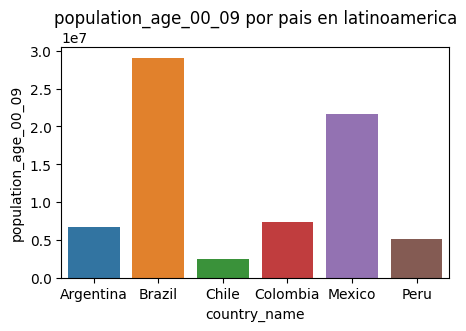

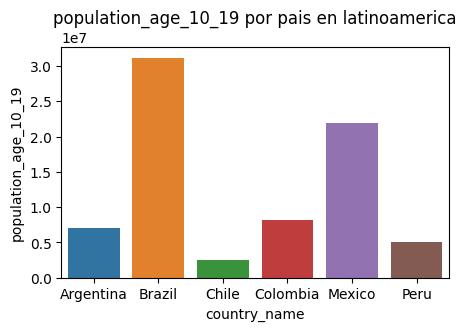

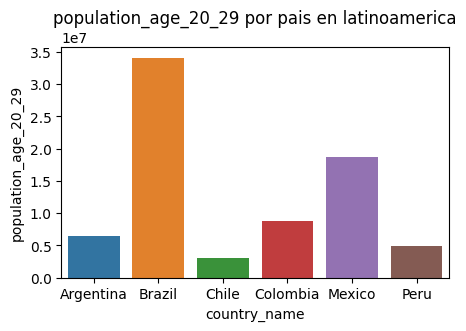

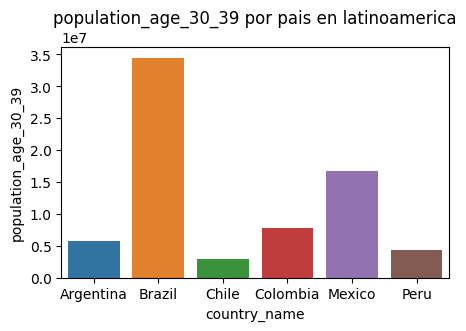

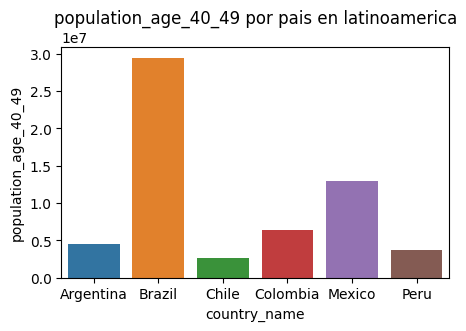

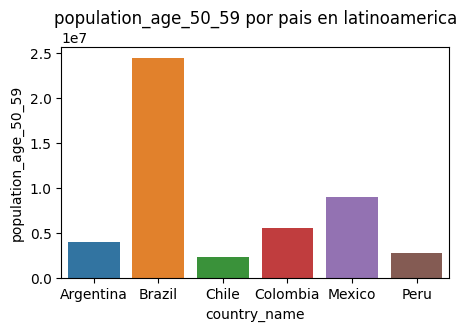

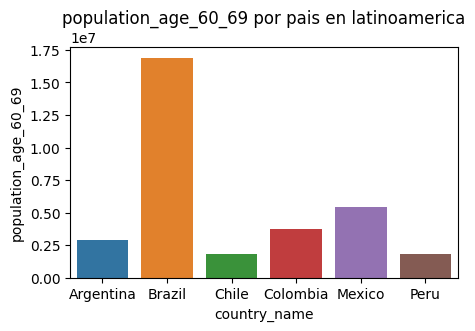

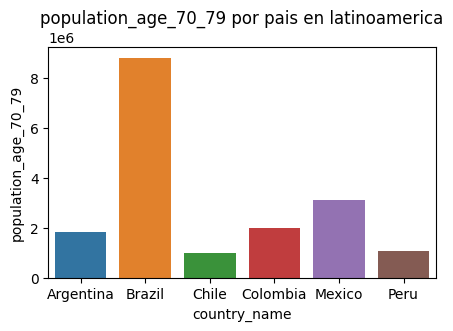

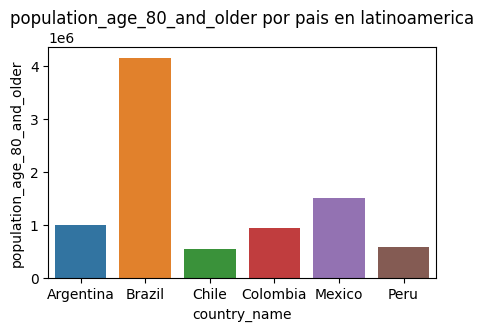

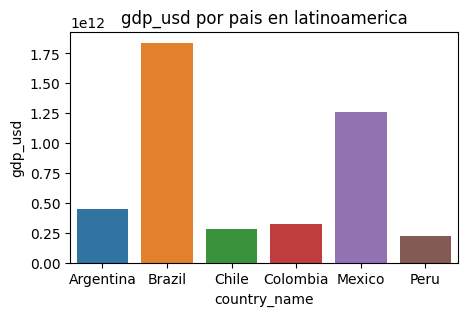

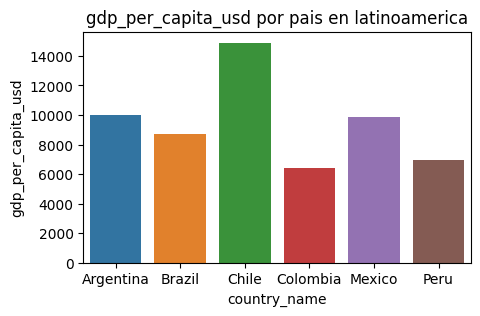

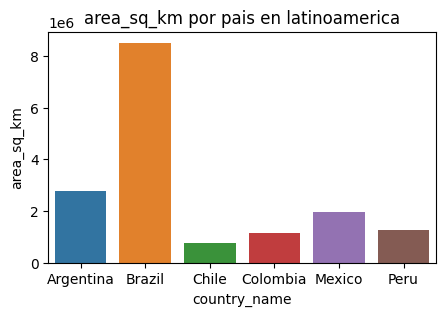

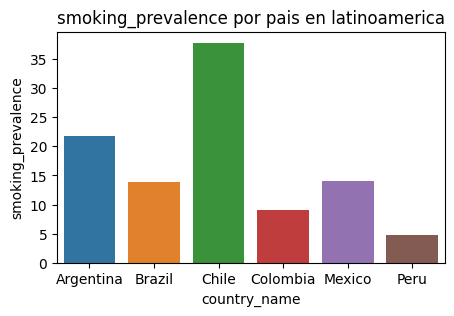

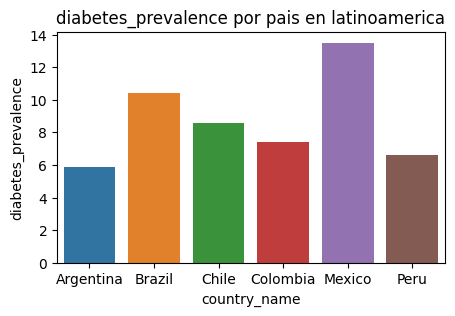

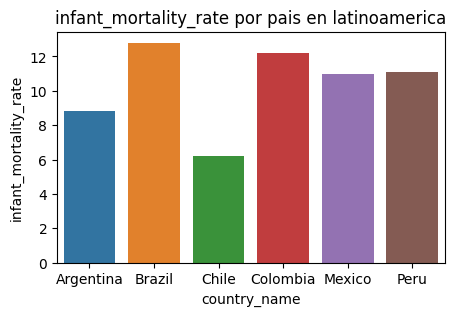

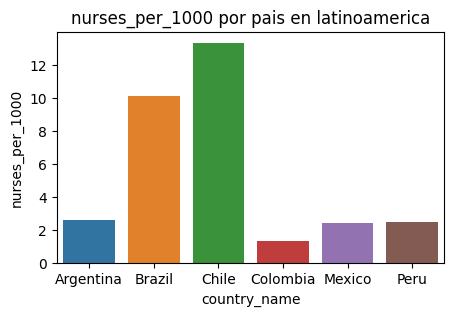

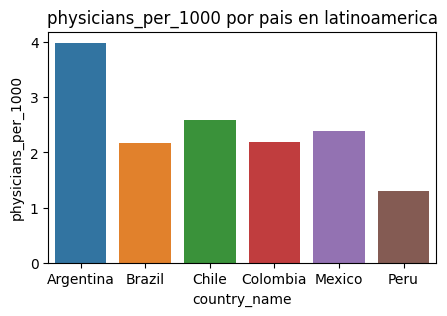

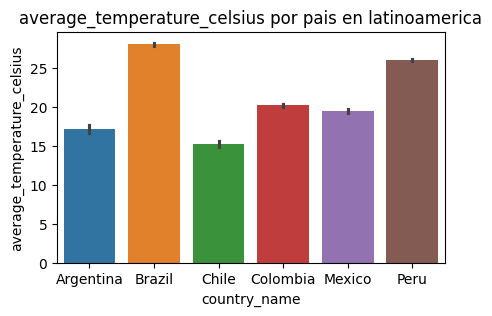

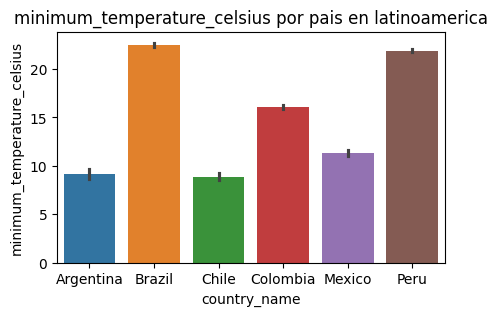

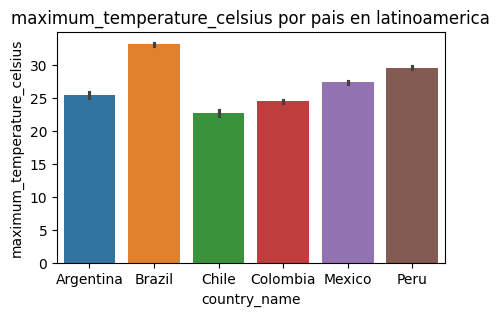

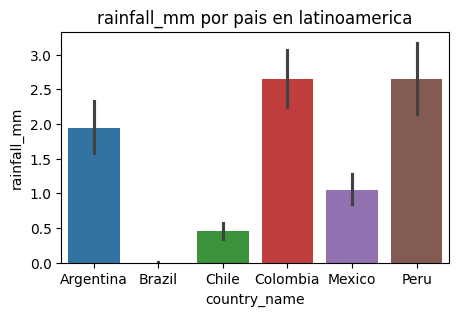

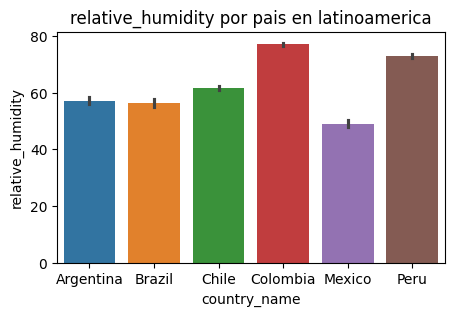

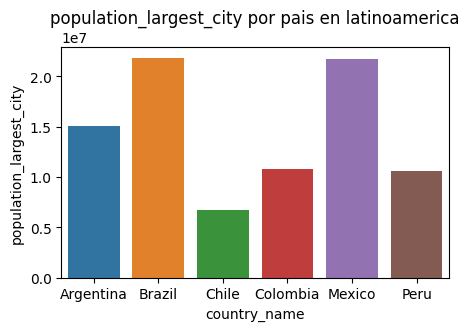

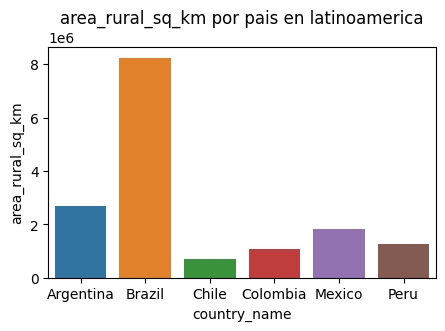

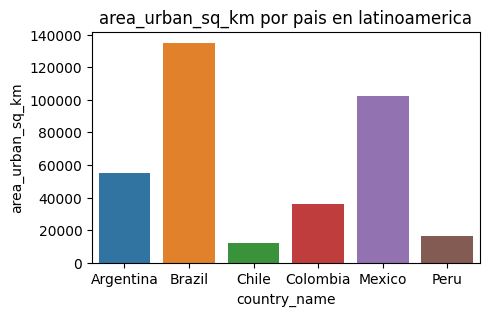

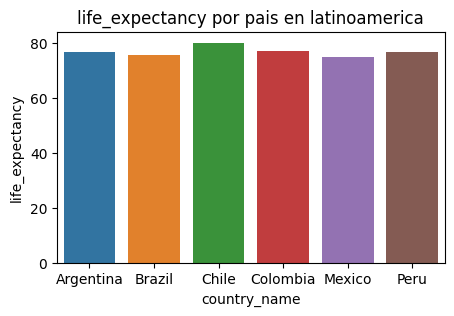

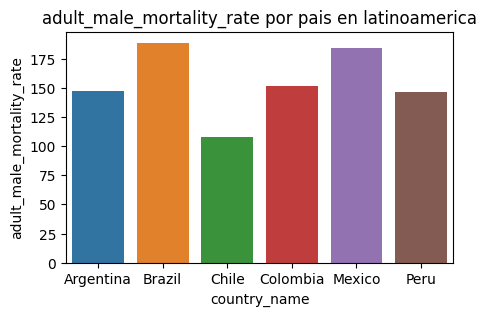

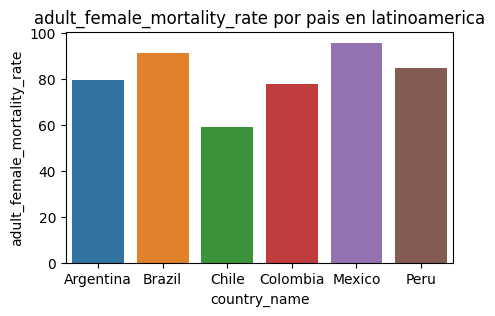

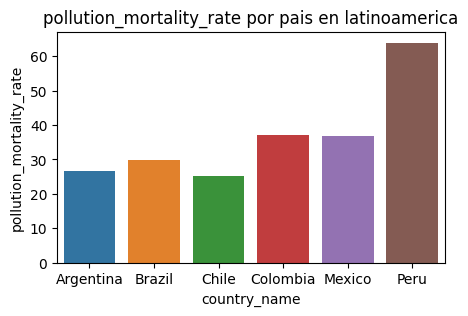

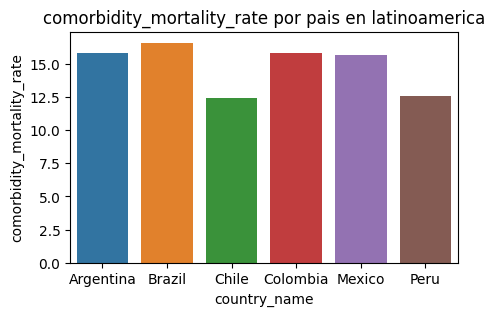

In [97]:
# Grafico de barras en data_latinoamerica_paises con 6 columnas(paises)
for i in data_latinoamerica_paises.columns:
    if i not in  ["location_key","date","country_code","country_name","longitude","latitude", "cumulative_confirmed","cumulative_decesed",
               "cumulative_recovered","new_recovered"]: # estas columnas se excluyen del grafico ya que en este tipo de grafico no tienen relevancia para mostrar un comportamiento 
                fig, ax = plt.subplots(figsize=(5, 3)) 
                sns.barplot(x='country_name', y=i, data=data_latinoamerica_paises, ax=ax, hue='country_name')# va de pais en pais mostrando grafico por variable, hue pone un color diferente a cada país
                plt.title(f'{i} por pais en latinoamerica')
                plt.show()

Se puede observar en los gráficos anteriores que la distribución de los datos para contagios y muertes es proporcional a la población de cada país, la población por grupos de edades también es proporcional

El grafico de population_density muestra la población por kilómetro cuadrado de la superficie terrestre y vemos que en México la ocupación de personas por kilómetro es mayor que en los demás países, Argentina vendría siendo el país que tiene menos ocupación de personas por kilómetro.

En cuanto a la variable de human_development la cual hace referencia al índice compuesto de indicadores de esperanza de vida, educación e ingreso per cápita; se observa que los países con el índice más alto son Argentina y Chile, los demás países están con un valor un poco más bajo todos con un valor muy similar.

El grafico con la variable gdp_per_capita, nos muestra que el país que más produce económicamente es Chile seguido de Argentina, México y Brasil.

Vemos que el porcentaje de fumadores más alto por población de cada país es Chile. Colombia y Perú con los porcentajes más bajos.

En cuanto a la prevalencia de diabetes esta México y Brasil con los porcentajes más altos, Argentina es el país en el que menos se evidencia diabetes.

La tasa de mortalidad infantil más alta esta en Brasil, Colombia, México y Perú. Chile Seguido de Argentina son países con menor mortalidad infantil por cada mil nacidos vivos.

Chile y Brasil son los países que cuentan con mayor número de enfermeras por cada mil personas, Argentina, Colombia, México y Perú están mucho más por debajo. Aunque Chile es un país con el territorio más pequeño cuenta con más cantidad de enfermeras.

Chile cuenta con las temperaturas horarias más bajas, Brasil y Perú con las más altas.

Los países con precipitaciones más altas son Colombia seguido de Perú y Argentina, y las precipitaciones más bajas están en Brasil, Chile y México.

La expectativa de vida en cada uno de los países esta entre los 70 y 80 años de edad.

En cuanto a la tasa de mortalidad por genero se observa que es más alta la tasa de mortalidad en hombres que en mujeres.

La tasa de mortalidad más alta por contaminación en el aire se le atribuye a Perú y la más baja a Chile.

Aunque hay gran diferencia de población entre países la tasa de mortalidad por enfermedades cardiovasculares, cáncer, diabetes o cardiorrespiratoria son bastante altas y similares, Chile con un menor resultado.


**Histogramas de las variables que “Sí” tenga cambios de valores*

Nos permite ver la distribución de los datos. Las variables presentadas tienen cambios de valores, es decir son  valores que tienen una variación

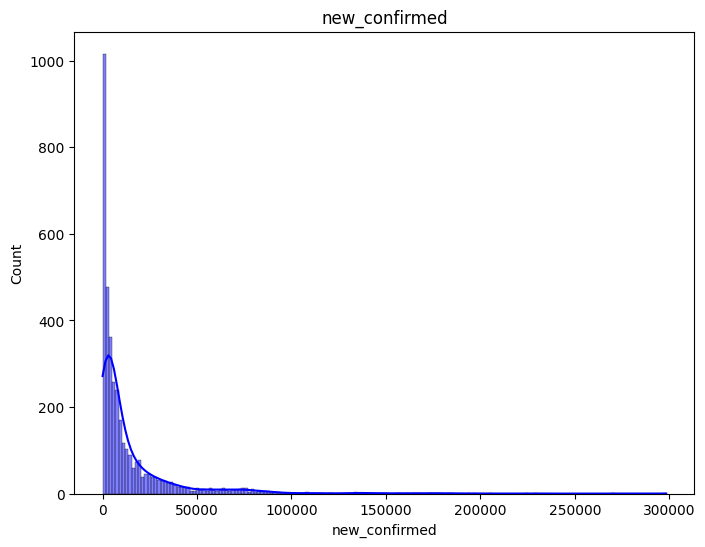

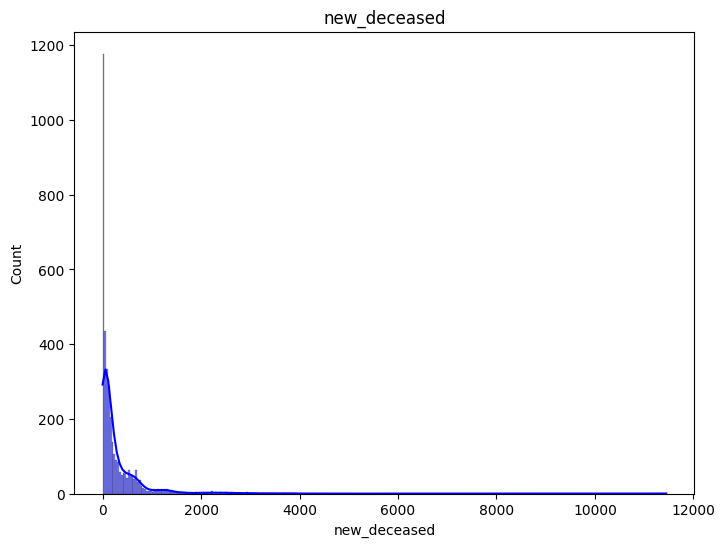

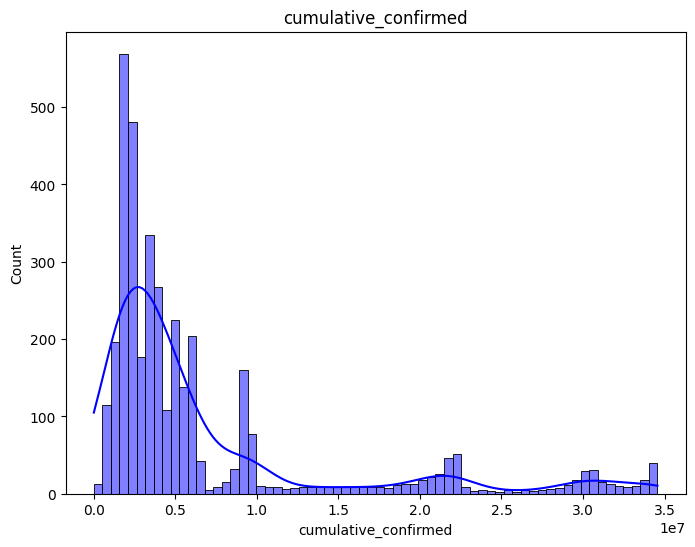

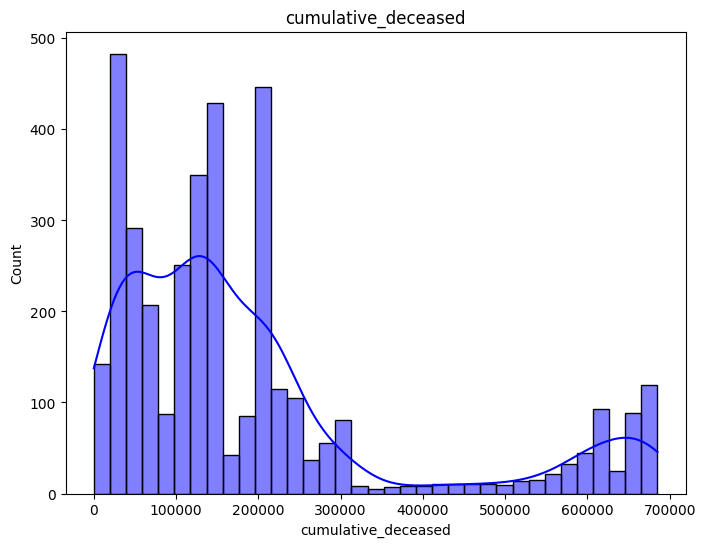

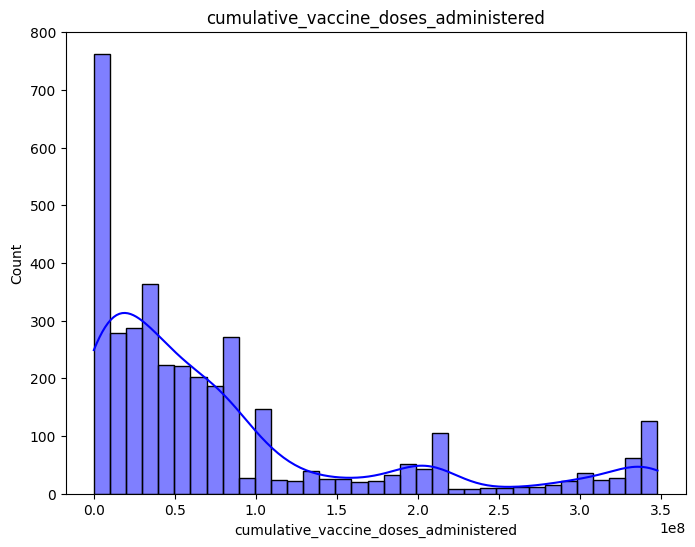

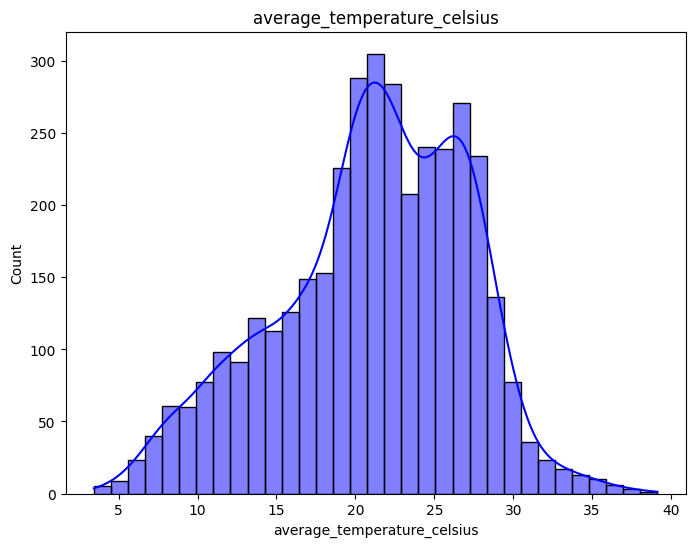

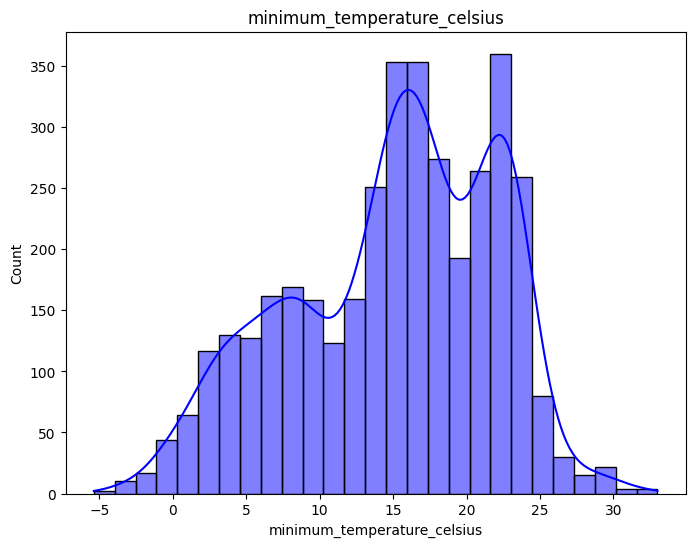

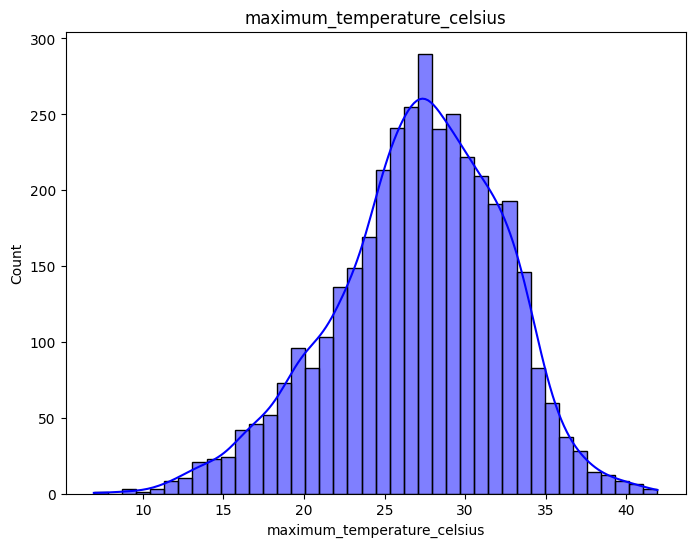

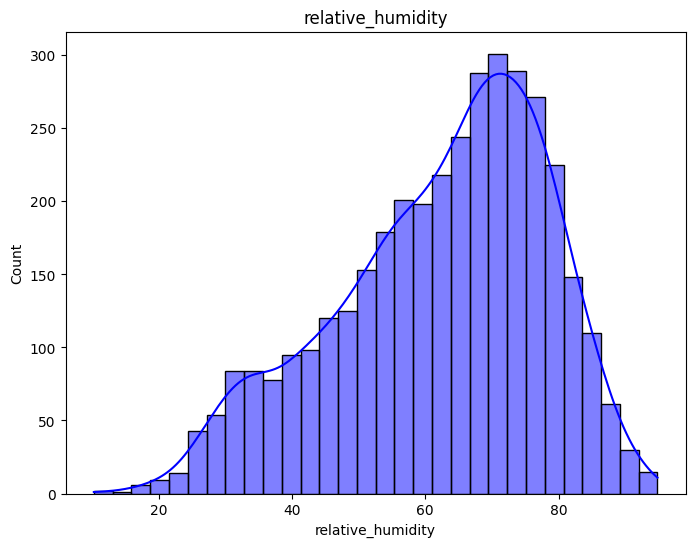

In [98]:
#Se definen las variables que va a llevar la lista de colmnas de nuestro conjento de datos
lista_columnas=["new_confirmed","new_deceased","cumulative_confirmed","cumulative_deceased",
                   "cumulative_vaccine_doses_administered","average_temperature_celsius","minimum_temperature_celsius",
                   "maximum_temperature_celsius","relative_humidity"]

# Crear histogramas de las variables numericas
# Se crea un bucle ´for´ sobre los nombres de las columnas en lista_columnas
for i in data_latinoamerica_paises[lista_columnas]:
    fig,ax = plt.subplots(figsize=(8,6)) # Se crea la figura
    #Para cada nombre de columna i se crea un histograma que muestre la distribución de los valores
    sns.histplot(data_latinoamerica_paises[i], kde=True, color="blue")
    plt.title(i) # El titulo es con el nombre de casa columna que se va iterando
    plt.show()#Muestra el gráfico

**Diagrama de dispersión de la temperatura media contra los casos confirmadas*

Se puede observar que la temperatura en algunos paises no influye en la casos confirmados en otros paises en cambio parece que sí existe una relacion.

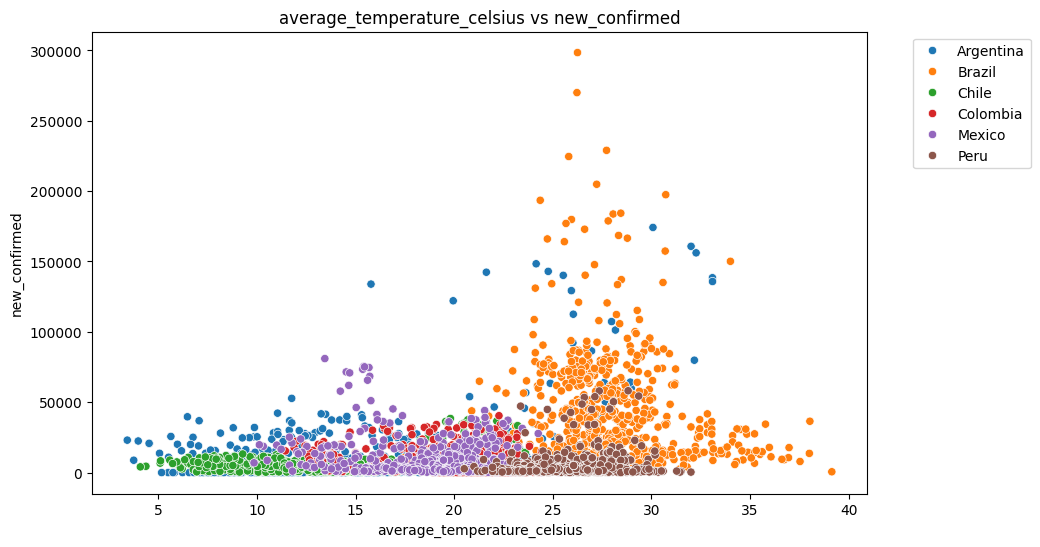

In [99]:
## grafica de average_temperature_celsius vs new_confirmed
fig,ax =plt.subplots(figsize=(10,6))
sns.scatterplot(x="average_temperature_celsius", y= "new_confirmed", data = data_latinoamerica_paises, hue="country_name")
plt.title("average_temperature_celsius vs new_confirmed")
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.show()




*Diagrama de dispersión de la temperatura media contra las muertes confirmadas*

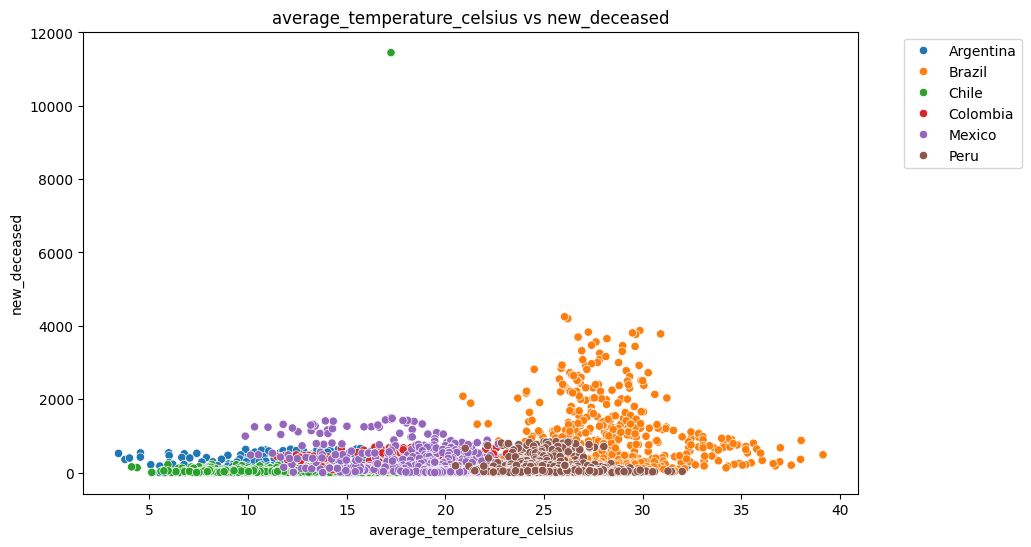

In [100]:
## grafica de average_temperature_celsius vs new_deceased
fig,ax =plt.subplots(figsize=(10,6))
sns.scatterplot(x="average_temperature_celsius", y= "new_deceased", data = data_latinoamerica_paises, hue="country_name")
plt.title("average_temperature_celsius vs new_deceased")
plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
plt.show()

**Comportamiento de las dosis administradas de todos los países (Valor medio)*

En este grafico se muestra el promedio de vacuanas en todos los paises por mes.

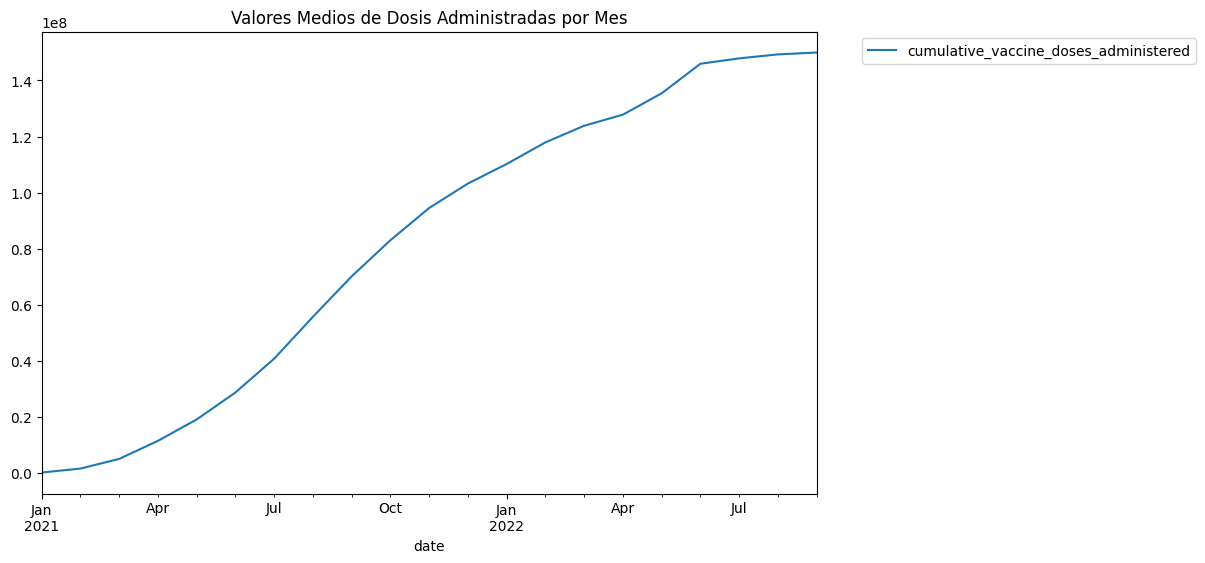

In [101]:
# Grafica de valores medios de todos los paises de las sumas de dosis administradas a personas
fig, ax = plt.subplots(figsize=(10,6))
# resample hace una agrupacion de los datos por mes
data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot()

plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.title('Valores Medios de Dosis Administradas por Mes')
plt.show()



En el gráfico anterior se puede ver que la cantidad de dosis administradas en Argentina, Brasil, Colombia, Peru, Chile y Mexico han ido aumentndo a lo largo del tiempo.

**Evolución de dosis administradas por mes de cada país*

In [102]:
paises_seleccionados=['Colombia', 'Argentina', 'Chile', 'Mexico', 'Peru','Brazil']

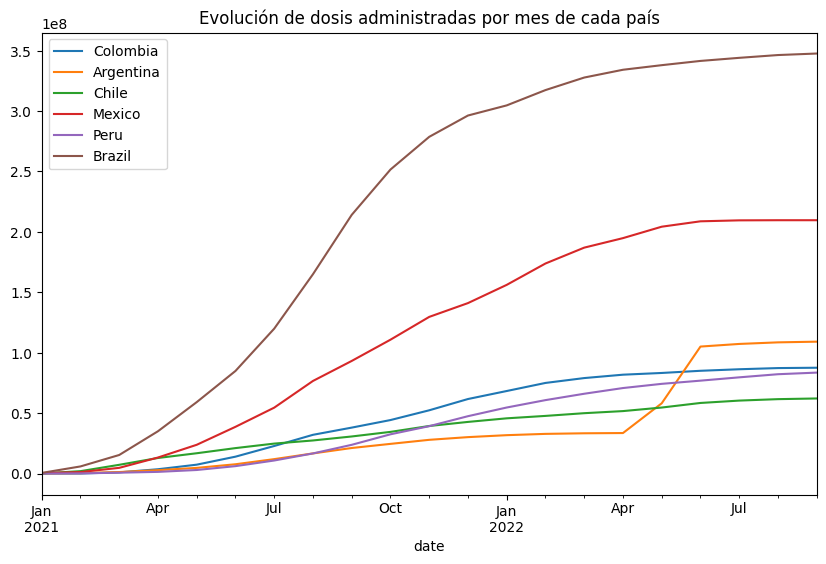

In [103]:
# Grafico de dosis administradas por mes de cada pais

fig, ax = plt.subplots(figsize=(10,6)) #Crea la fiugra
for pais in paises_seleccionados:# itera sobre cada pais seleccionado
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot()
     # Filtrar los datos para el país actual y luego hace una agrupacion de los datos por mes para obtener la media mensual de dosis administradas#

plt.title('Evolución de dosis administradas por mes de cada país')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()


Se observa que algunos paises la cantidad de dosis administradas ha ido aumentando a lo largo del tiemnpo, aunque en otros paises la cantidad de vacunas administradas ha ido disminuyendo, esto puede ser debido a la cantidad de vacunas dismponibles.

**Muertes por mes de cada país*

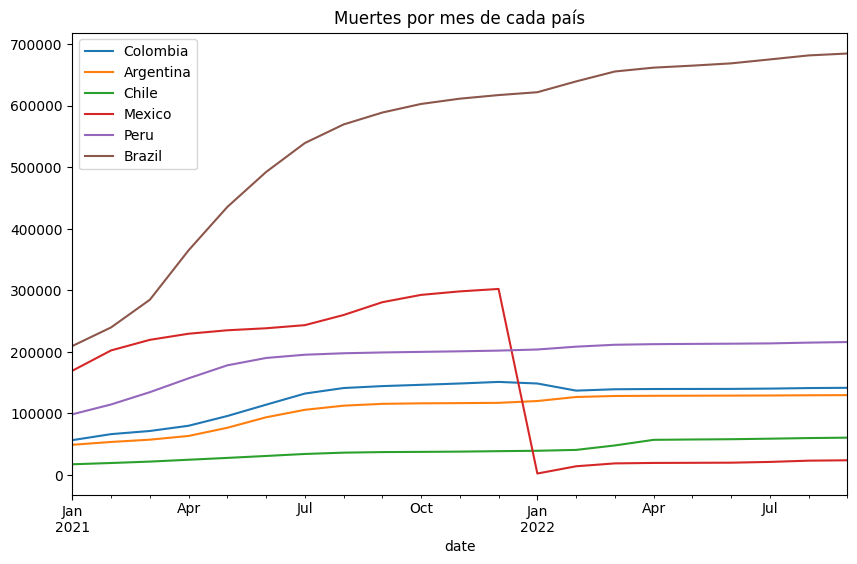

In [104]:
# Muertes por mes de cada país

fig, ax = plt.subplots(figsize=(10,6)) #Crear figura
for pais in paises_seleccionados:# itera sobre cada pais seleccionado
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_deceased'].plot()
 #Esto filtra los datos de América Latina para el país actual en la iteración.
 #Aquí, los datos se remuestrean ('resample') para agruparlos por mes ('M') y calcular la media de las muertes ('cumulative_deceased'). Luego, se
 # traza la evolución mensual de las muertes para el país actual en el gráfico.

plt.title('Muertes por mes de cada país')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

El pais que mas muertes ha tenido es Brasil, seguido de Mexico, Peru, Colombia, Argentina y Chile. Tambien se observa una disminucion importante de muertes en el mes de junio de 2022 para Mexico lo cual podria ser por suministro de vacunas o estrategia del gobierno para el mes de diciembre.

Ademas es posible que halla una perdida de datos.

La cantidad de dosis administradas en Brasil es alta, esto se debe muy seguramente a que la poblacion es mucho mas grande respecto a los demas paises.

**Casos confirmados por mes de cada país*

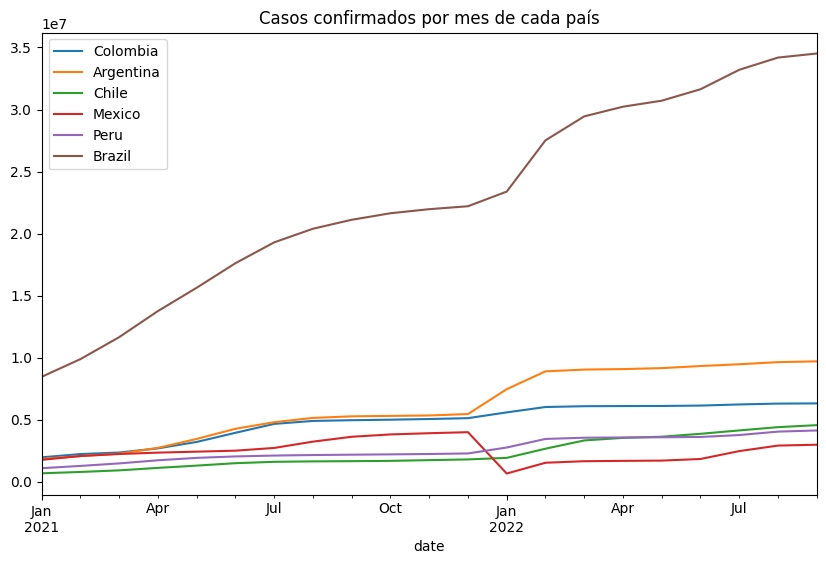

In [105]:
# Grafico casos confirmados en cada pais por mes
fig, ax = plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_confirmed'].plot()


plt.title('Casos confirmados por mes de cada país')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()


Nuevamente se ve que la cantidad de caso varia de acuerdo a la cantidad de habitantes de cada uno de los paises. Tambienn se observa que en Mexico hay una disminucion de casos confimados en el mes de junio de 2022.


**Recuperaciones de casos por mes de cada país*

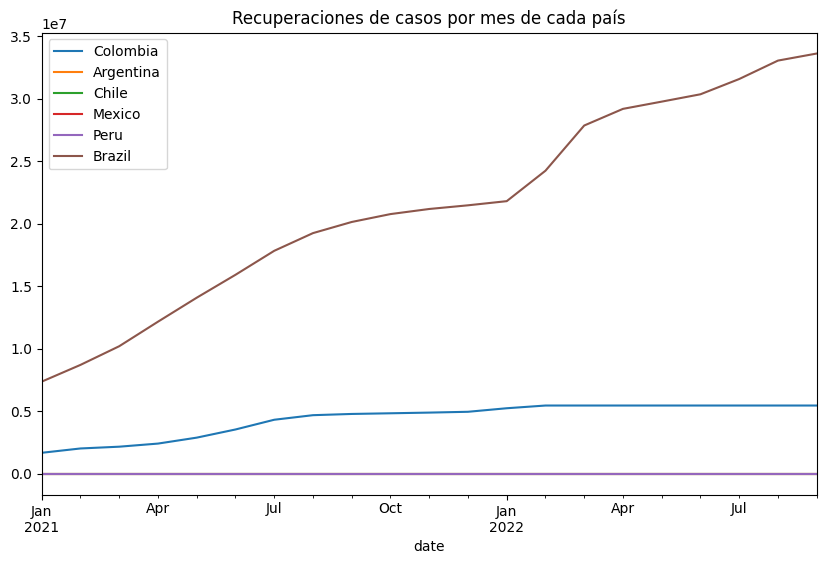

In [106]:
# Recuperaciones de casos por mes de cada país.
fig, ax = plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_recovered'].plot()


plt.title('Recuperaciones de casos por mes de cada país')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

El pais de recuperaciones con casos mas altos nuevamente es Brasil, siento un pais con mas población. 

**Comparación del Número de Casos Nuevos entre Países*

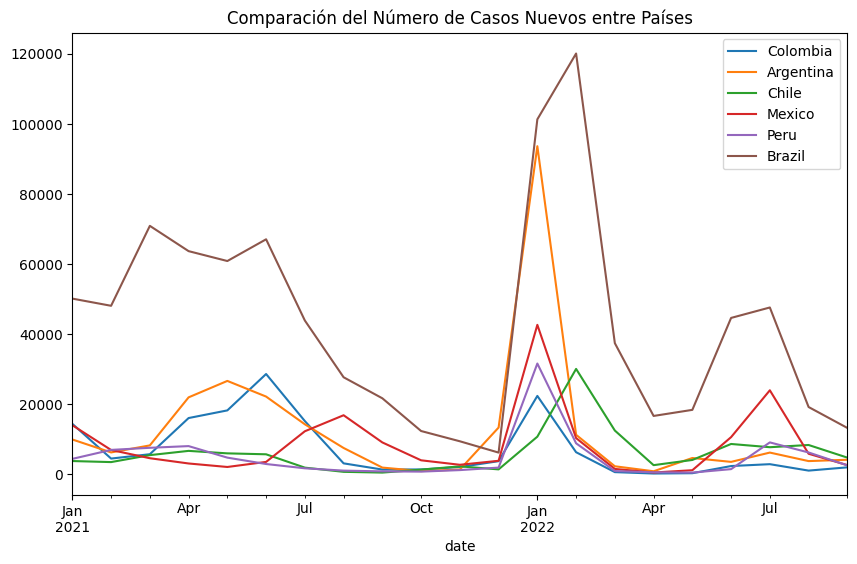

In [107]:
#Comparación del Número de Casos Nuevos entre Países.
fig, ax = plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['new_confirmed'].plot()


plt.title('Comparación del Número de Casos Nuevos entre Países')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

En el grafico anterior se observa que para el mes de diciembre hay un pico alto de nuevos casos en todos los paises, esto se puede deber a fiestas y vacaciones 

**Dosis acumuladas por país*

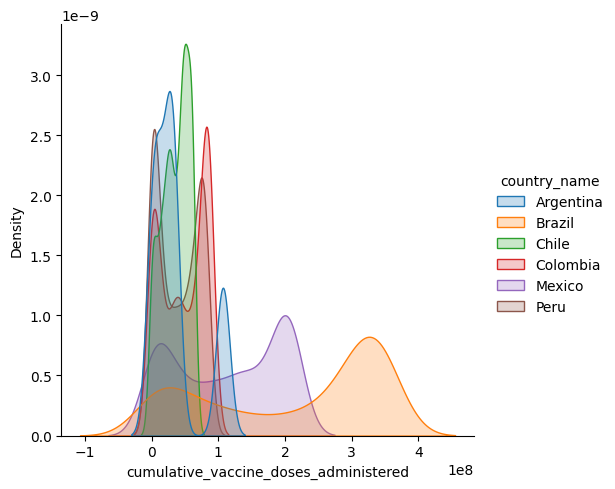

In [108]:
sns.displot(data_latinoamerica_paises, x= "cumulative_vaccine_doses_administered", hue="country_name", kind="kde", fill= True)

**Boxplot de temperatura media de cada país*

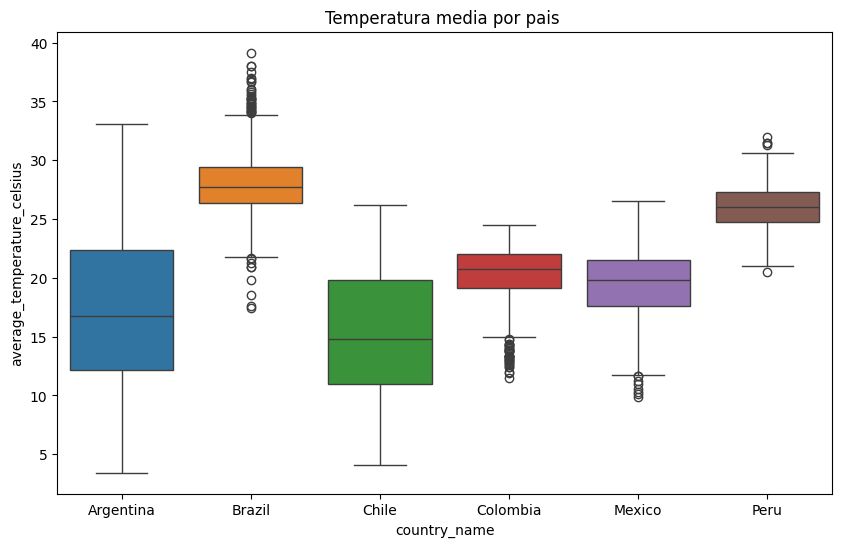

In [109]:
fig,ax=plt.subplots(figsize=(10,6))
sns.boxplot(x="country_name", y= "average_temperature_celsius", data= data_latinoamerica_paises, hue = "country_name")
plt.title("Temperatura media por pais ")
plt.show()

Se puede ver que  aunque Chile  tiene rangos de temperatura que estan dentro de climas frios y calientes es el pais que mejor ha manejado la pandemia a diferencia de los otros paises.

Los paises donde se podria crear los nuevos centros es en paises donde hay mas casos y muertes.

Esto solo seria una consideracion basada hasta el momento hay que esperar a realizar mas analisis que pueda llevar a una decision mas clara.

**Violinplot de las variables que “Sí” tenga cambios de valores*

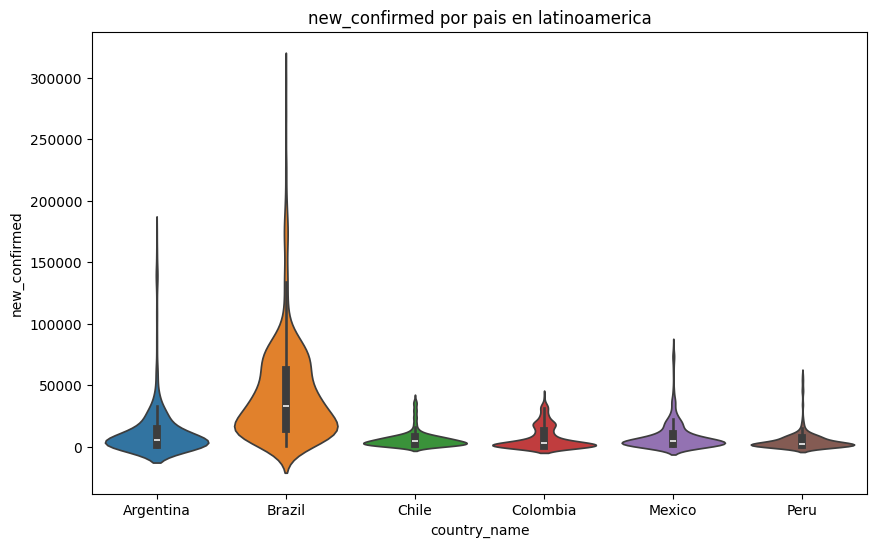

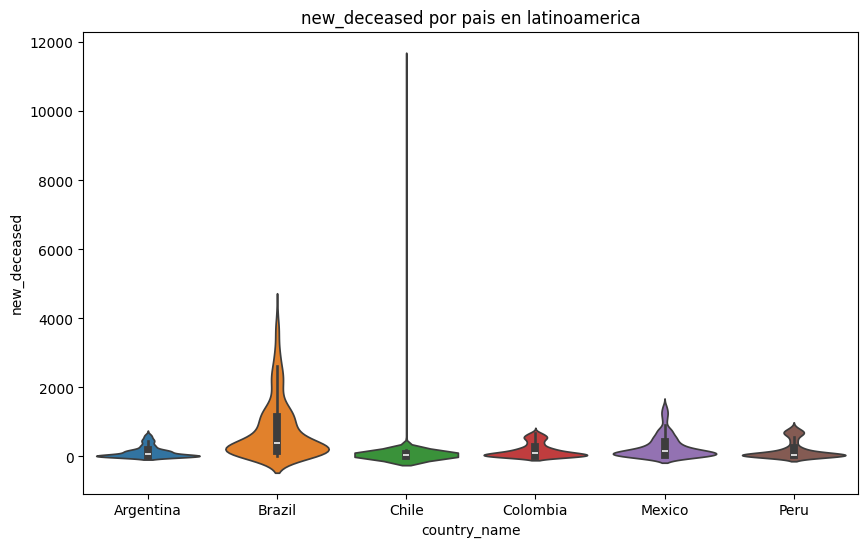

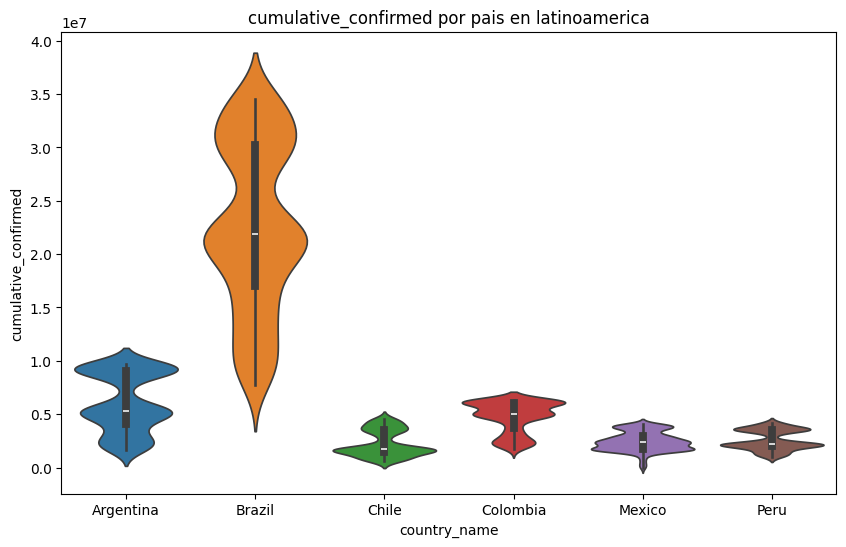

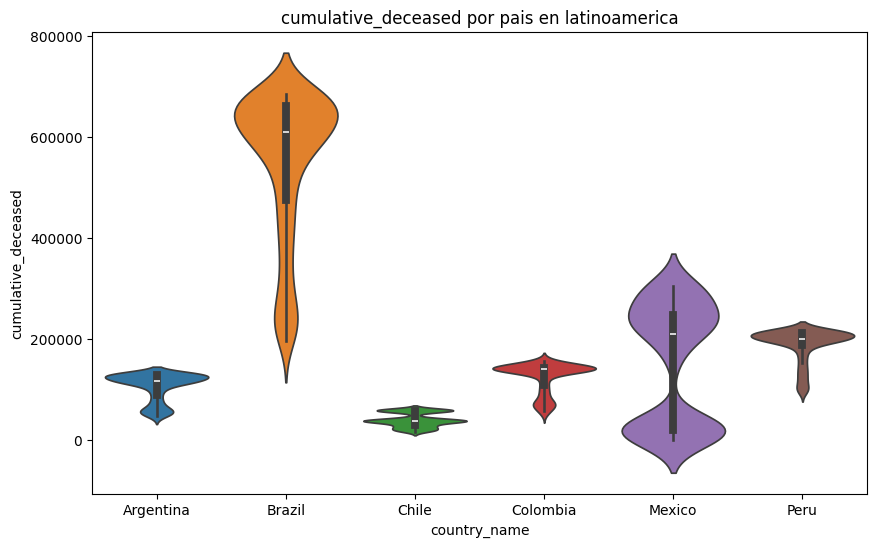

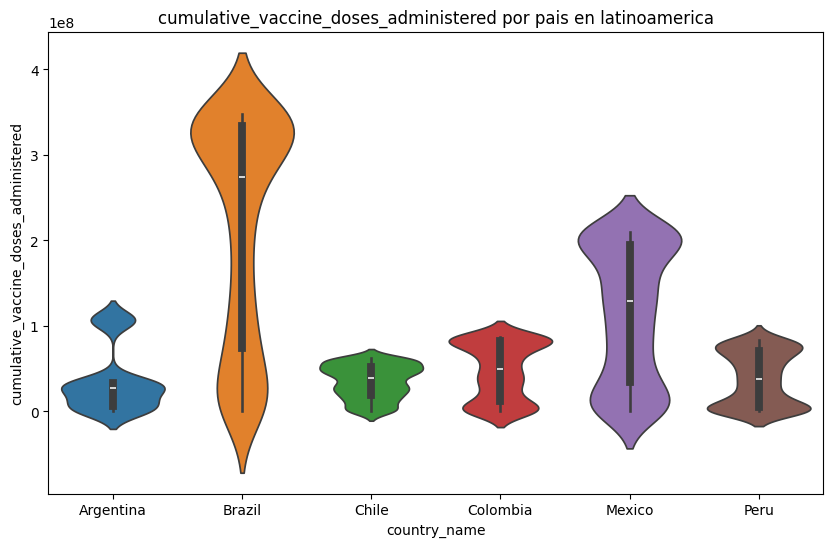

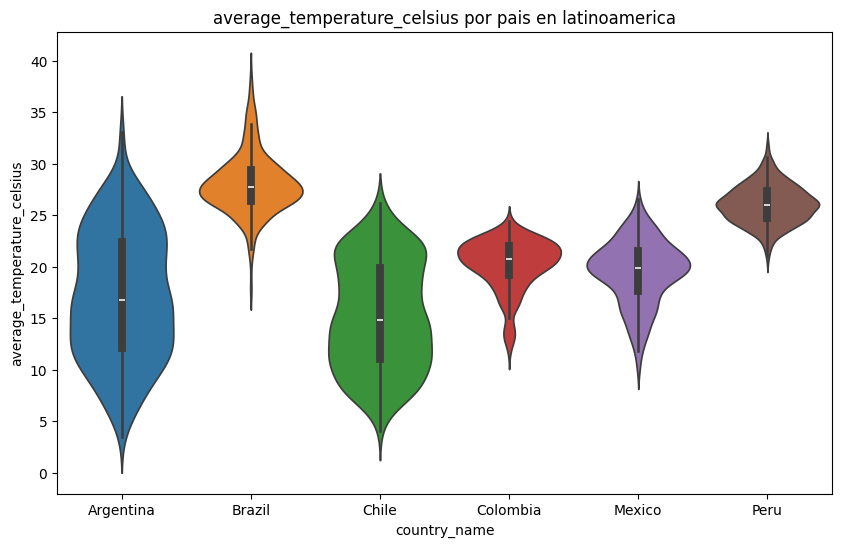

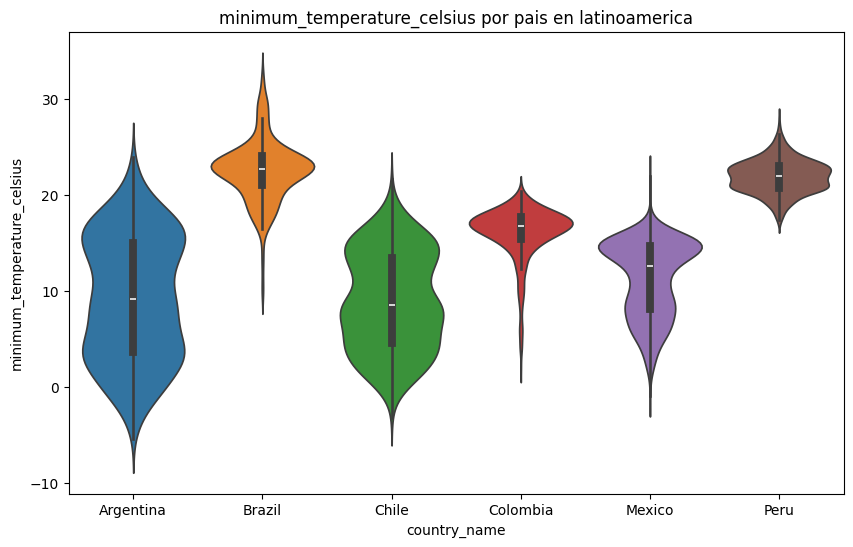

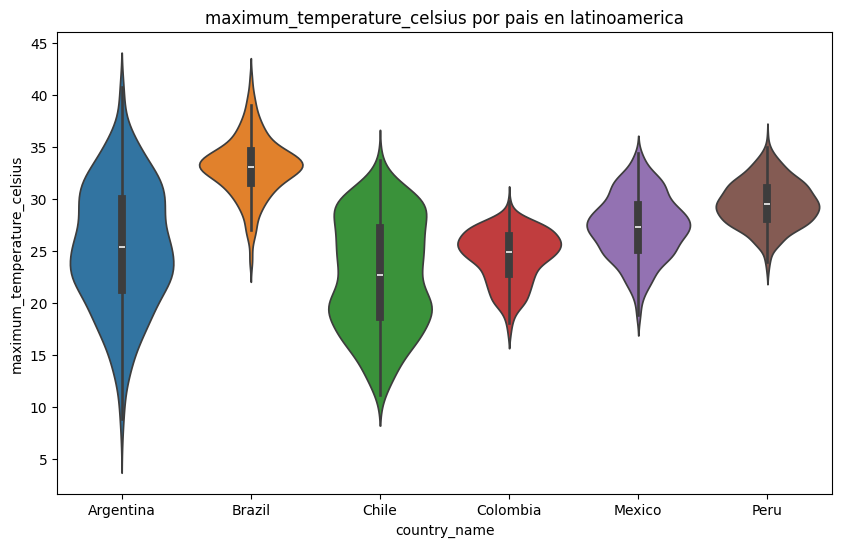

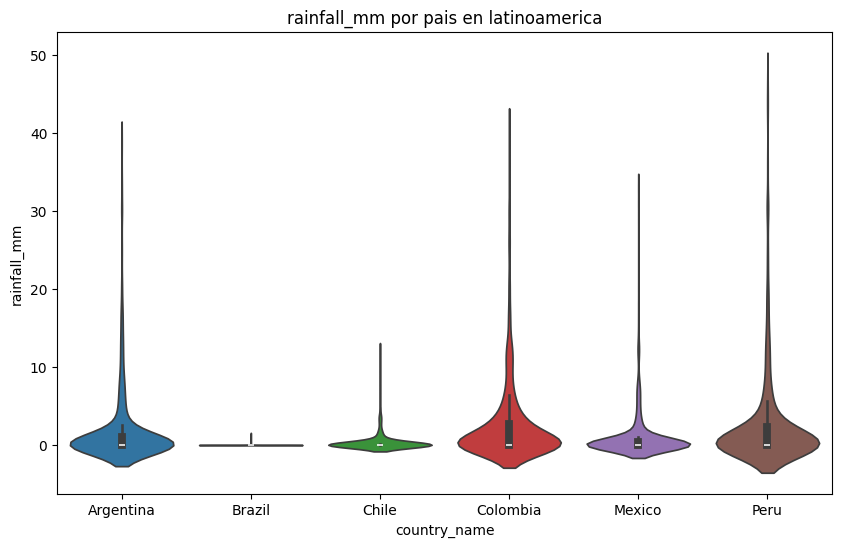

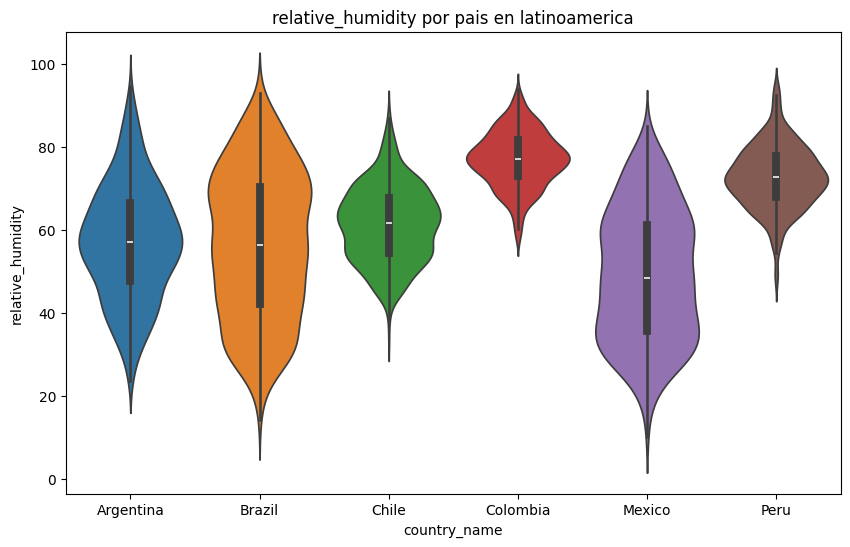

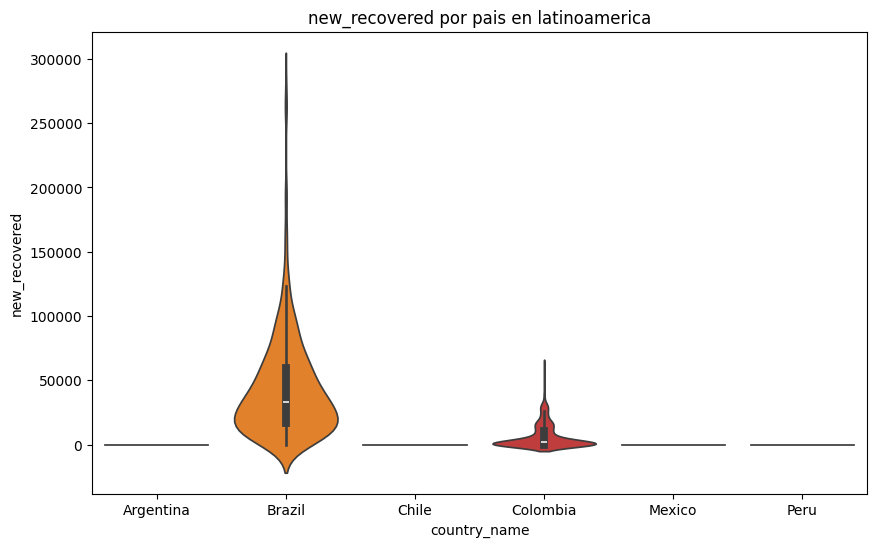

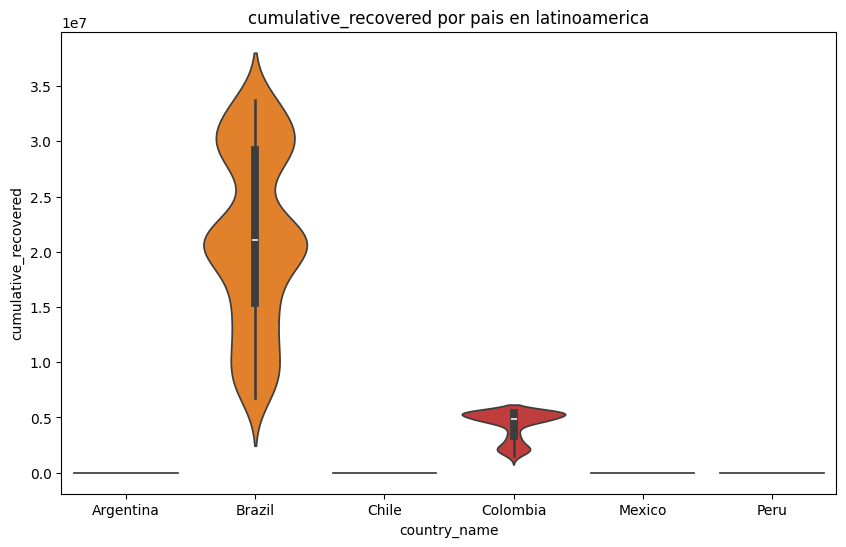

In [110]:
columnas_mayores_6=[]
for i in data_latinoamerica_paises.columns:
    if i not in ['location_key','date','country_code','latitude','longitude']:
        if data_latinoamerica_paises[i].nunique()>6:
            columnas_mayores_6.append(i)

columnas_mayores_6.append('country_name')

data_latinoamerica_paises_mayores_6=data_latinoamerica_paises[columnas_mayores_6]

for i in data_latinoamerica_paises_mayores_6.columns:
    if i not in ['location_key','date','country_code','latitude','longitude','country_name']:
        fig, ax = plt.subplots(figsize=(10,6))
        sns.violinplot(x='country_name', y=i, data=data_latinoamerica_paises_mayores_6, hue='country_name')
        plt.title(f'{i} por pais en latinoamerica')
        plt.show()



**Distribución de la población por grupos de edad*

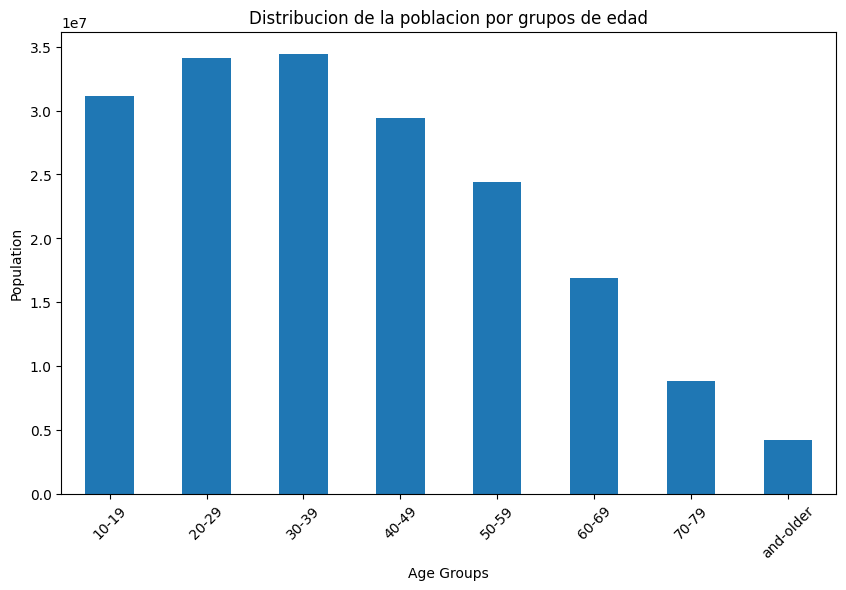

In [111]:
#distribucion de la poblacion por grupo de edad

age_columns =['population_age_10_19','population_age_20_29','population_age_30_39','population_age_40_49',
              'population_age_50_59','population_age_60_69','population_age_70_79', 'population_age_80_and_older']
age_distribution = data_latinoamerica_paises[age_columns].max()

plt.figure(figsize=(10,6)) # Crear figura
age_distribution.plot(kind='bar',stacked=True)
plt.xlabel('Age Groups')
plt.ylabel('Population')
plt.title('Distribucion de la poblacion por grupos de edad')
plt.xticks(range(len(age_columns)),[col.split('_')[-2] + '-' + col.split('_')[-1] for col in age_columns], rotation=45)

plt.show()

En el gráfico anterior se puede ver la poblacion por grupos de edad

Se crean nuevos grupos de edad que van de los 0 a los 19 años, 20 a 39, 40 a 59, 60 a 79 y de 80 o mas años. 

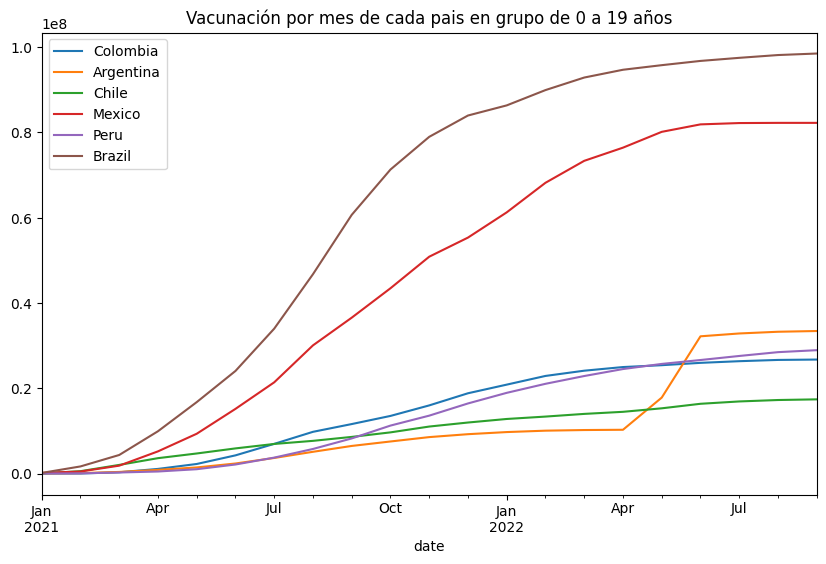

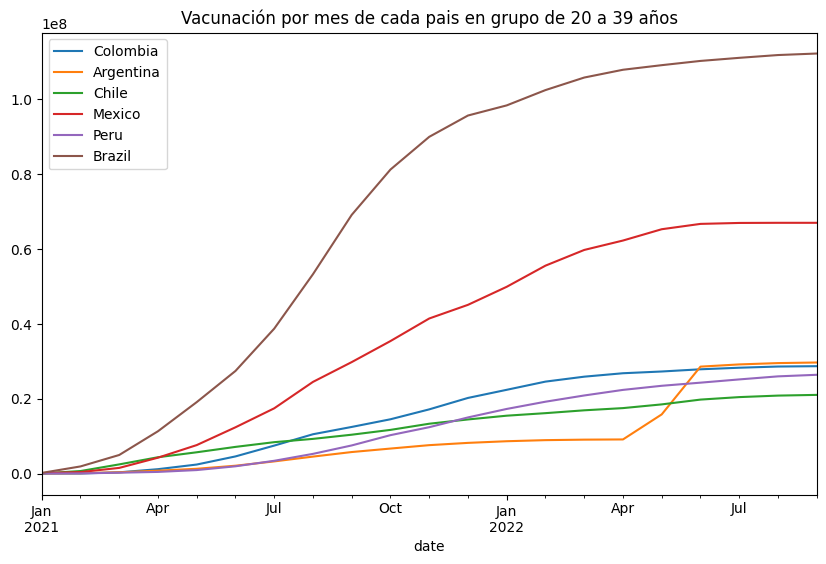

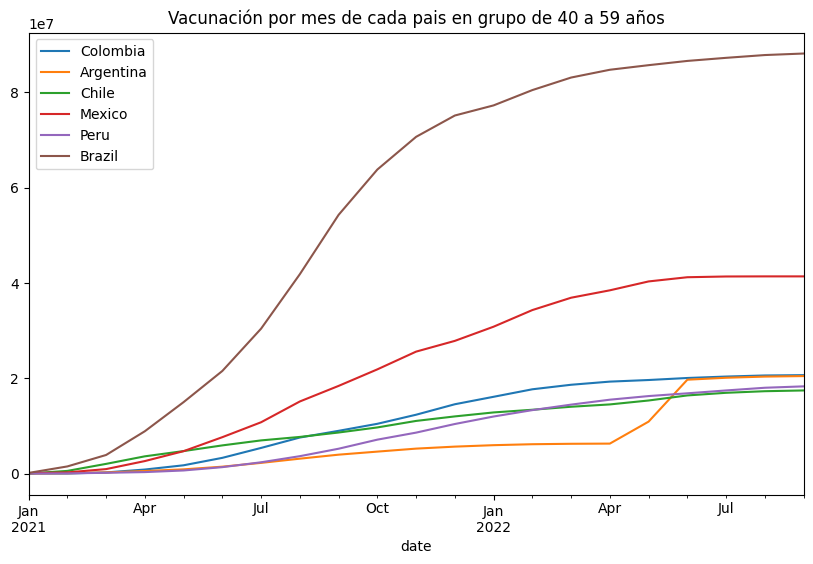

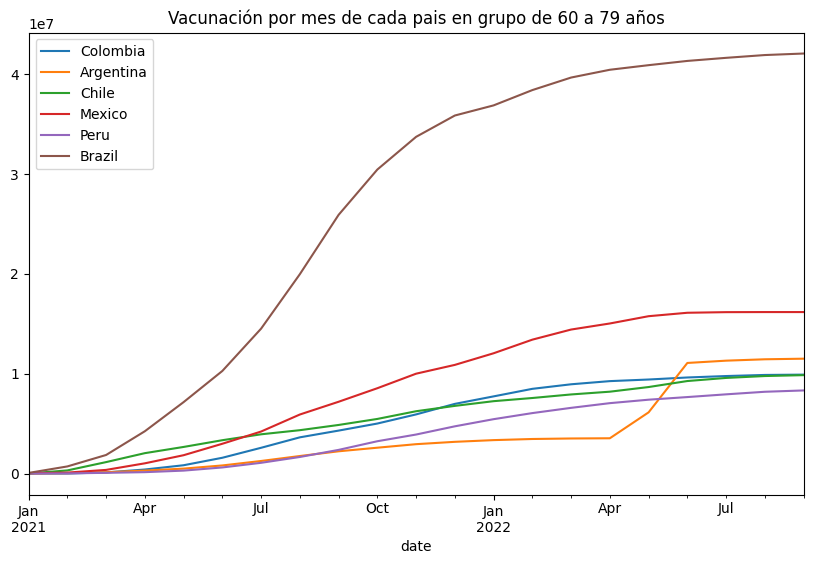

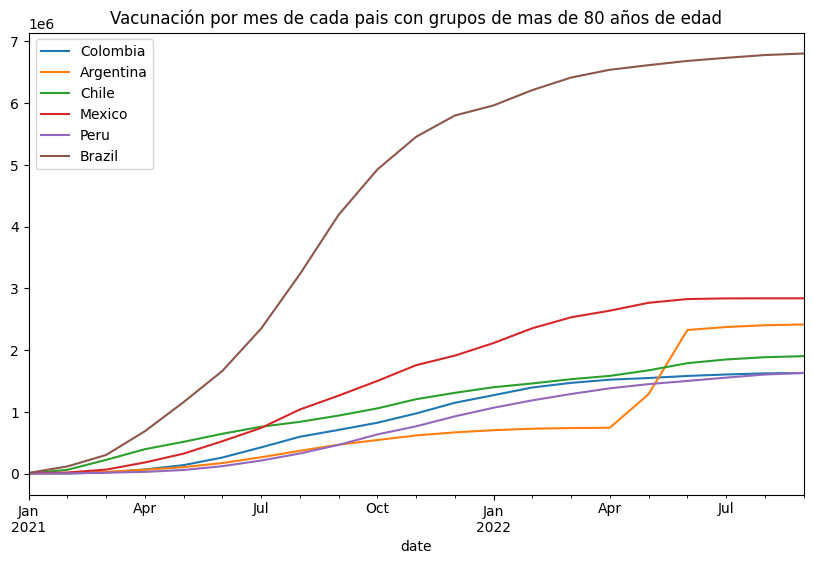

In [112]:
#grupo etareo mas vacunado
data_latinoamerica_paises['population_age_00_19']=data_latinoamerica_paises['population_age_00_09']+data_latinoamerica_paises['population_age_10_19']
data_latinoamerica_paises['population_age_20_39']=data_latinoamerica_paises['population_age_20_29']+data_latinoamerica_paises['population_age_30_39']
data_latinoamerica_paises['population_age_40_59']=data_latinoamerica_paises['population_age_40_49']+data_latinoamerica_paises['population_age_50_59']
data_latinoamerica_paises['population_age_60_79']=data_latinoamerica_paises['population_age_60_69']+data_latinoamerica_paises['population_age_70_79']
data_latinoamerica_paises['population_age_80_and_older']=data_latinoamerica_paises ['population_age_80_and_older']

data_latinoamerica_paises['population_age_00_19_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_00_19']/data_latinoamerica_paises['population']
data_latinoamerica_paises['population_age_20_39_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_20_39']/data_latinoamerica_paises['population']
data_latinoamerica_paises['population_age_40_59_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_40_59']/data_latinoamerica_paises['population'] 
data_latinoamerica_paises['population_age_60_79_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises['population_age_60_79']/data_latinoamerica_paises['population'] 
data_latinoamerica_paises['population_age_80_and_older_vacunados']=data_latinoamerica_paises['cumulative_vaccine_doses_administered']*data_latinoamerica_paises ['population_age_80_and_older']/data_latinoamerica_paises['population']

data_latinoamerica_paises['population_age_00_19_vacunados']=data_latinoamerica_paises['population_age_00_19_vacunados'].fillna(0) 
data_latinoamerica_paises['population_age_20_39_vacunados']=data_latinoamerica_paises['population_age_20_39_vacunados'].fillna(0) 
data_latinoamerica_paises['population_age_40_59_vacunados']=data_latinoamerica_paises['population_age_40_59_vacunados'].fillna(0) 
data_latinoamerica_paises['population_age_60_79_vacunados']=data_latinoamerica_paises['population_age_60_79_vacunados'].fillna(0) 
data_latinoamerica_paises['population_age_80_and_older_vacunados']=data_latinoamerica_paises ['population_age_80_and_older_vacunados'].fillna(0) 

data_latinoamerica_paises['population_age_00_19_vacunados']=data_latinoamerica_paises['population_age_00_19_vacunados'].astype(int) 
data_latinoamerica_paises['population_age_20_39_vacunados']=data_latinoamerica_paises['population_age_20_39_vacunados'].astype(int) 
data_latinoamerica_paises['population_age_40_59_vacunados']=data_latinoamerica_paises['population_age_40_59_vacunados'].astype(int) 
data_latinoamerica_paises['population_age_60_79_vacunados']=data_latinoamerica_paises['population_age_60_79_vacunados'].astype(int)
data_latinoamerica_paises['population_age_80_and_older_vacunados']=data_latinoamerica_paises['population_age_80_and_older_vacunados'].astype(int)

data_latinoamerica_paises['population_age_00_19_vacunados'].max() 
data_latinoamerica_paises['population_age_20_39_vacunados'].max()
data_latinoamerica_paises['population_age_40_59_vacunados'].max()
data_latinoamerica_paises['population_age_60_79_vacunados'].max()
data_latinoamerica_paises['population_age_80_and_older_vacunados'].max()

# Grafica de valores medios de todos los paises cumulative_vaccine_doses_administered
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises ['country_name'] ==pais]. resample('ME').mean (numeric_only=True) ['population_age_00_19_vacunados'].plot()
plt.title('Vacunación por mes de cada pais en grupo de 0 a 19 años')
plt.legend(bbox_to_anchor= (1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

# Grafica de valores medios de todos los paises cumulative_vaccine_doses_administered
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises ['country_name'] ==pais]. resample('ME').mean (numeric_only=True) ['population_age_20_39_vacunados'].plot()
plt.title('Vacunación por mes de cada pais en grupo de 20 a 39 años')
plt.legend(bbox_to_anchor= (1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

# Grafica de valores medios de todos los paises cumulative_vaccine_doses_administered
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises ['country_name'] ==pais]. resample('ME').mean (numeric_only=True) ['population_age_40_59_vacunados'].plot()
plt.title('Vacunación por mes de cada pais en grupo de 40 a 59 años')
plt.legend(bbox_to_anchor= (1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

# Grafica de valores medios de todos los paises cumulative_vaccine_doses_administered
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises ['country_name'] ==pais]. resample('ME').mean (numeric_only=True) ['population_age_60_79_vacunados'].plot()
plt.title('Vacunación por mes de cada pais en grupo de 60 a 79 años')
plt.legend(bbox_to_anchor= (1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

# Grafica de valores medios de todos los paises cumulative_vaccine_doses_administered
fig, ax = plt.subplots(figsize=(10, 6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises ['country_name'] ==pais]. resample('ME').mean (numeric_only=True) ['population_age_80_and_older_vacunados'].plot()
plt.title('Vacunación por mes de cada pais con grupos de mas de 80 años de edad')
plt.legend(bbox_to_anchor= (1.05, 1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()


**Diagrama de barras apilado de comparación de la tasa de mortalidad masculina vs. femenina por país.*

<function matplotlib.pyplot.show(close=None, block=None)>

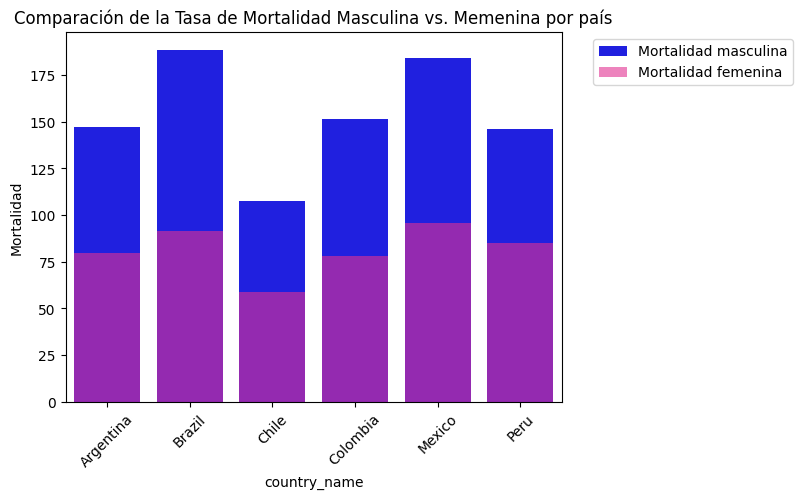

In [113]:
#Comparación de la Tasa de Mortalidad Masculina vs. Memenina por país.
sns.barplot(data=data_latinoamerica_paises, x='country_name', y='adult_male_mortality_rate', color='blue', label='Mortalidad masculina')
sns.barplot(data=data_latinoamerica_paises, x='country_name', y='adult_female_mortality_rate', color='deeppink', alpha=0.6, label='Mortalidad femenina')
plt.xticks(rotation=45)
plt.ylabel('Mortalidad')
plt.title('Comparación de la Tasa de Mortalidad Masculina vs. Memenina por país')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show

Se puede ver que en todos los paises la mortalidad en los hombres es mayor que en las mujeres lo que quiere decir que los hombres son mas vulnerables 

**Matriz de correlación de indicadores demográficos y de salud*

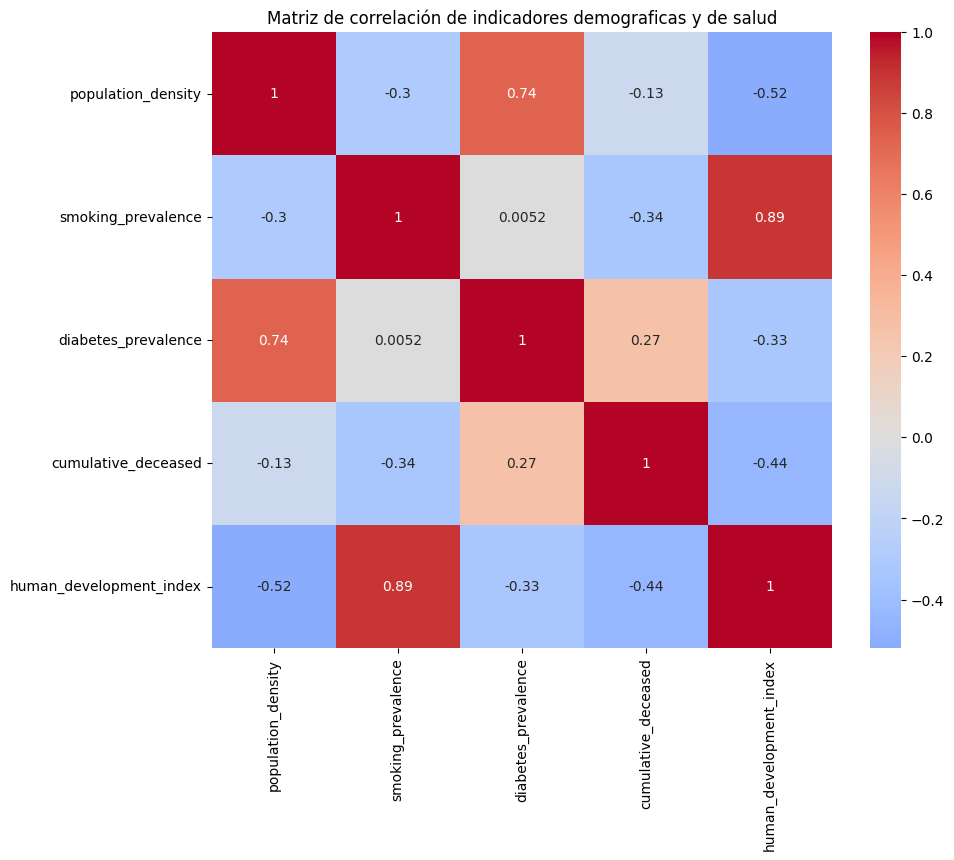

In [114]:
#Matriz de correlación de indicadores demográficos y de salud.
columns=['population_density', 'smoking_prevalence', 'diabetes_prevalence','cumulative_deceased','human_development_index']


correlacion_matriz=data_latinoamerica_paises[columns].corr()
mask= np.triu(np.ones_like(correlacion_matriz,dtype=bool))
plt.figure(figsize=(10,8))
sns.heatmap(correlacion_matriz, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de correlación de indicadores demograficas y de salud')
plt.show()

Se observa que la enfermedad de la deabetes y el fumar son condiciones que afectan la salud en los paises seleccionados. Se podria decir que estas enfermedadaes son las que mas han causado muertes en los paises seleccionados.

**Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad.*

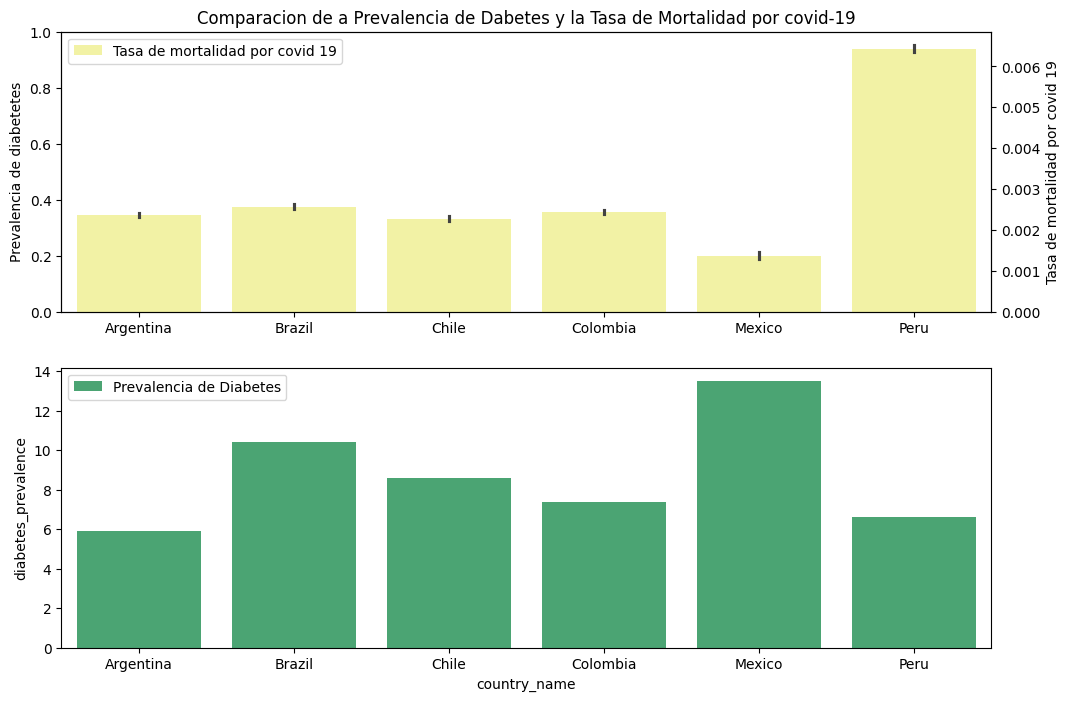

In [115]:

#Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad.
fig, (ax,ax2) = plt.subplots(2,1, figsize=(12,8)) # Crear una figura con dos subtramas verticales

# Graficar la prevalencia de diabetes en la primera subtrama
sns.barplot(data=data_latinoamerica_paises, x=data_latinoamerica_paises['country_name'], y=data_latinoamerica_paises ['diabetes_prevalence'],color='mediumseagreen', label='Prevalencia de Diabetes') 
# Crear una segunda subtrama y asociarla con el eje y de la primera subtrama
ax2=ax.twinx()
# Graficar la tasa de mortalidad por COVID-19 en la segunda subtrama
sns.barplot(data=data_latinoamerica_paises, x=data_latinoamerica_paises['country_name'], y=data_latinoamerica_paises['cumulative_deceased']/data_latinoamerica_paises['population'], color='yellow',label='Tasa de mortalidad por covid 19', ax=ax2,
    alpha=0.4)
# Girar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=90)
ax.set_ylabel('Prevalencia de diabetetes')
ax2.set_ylabel('Tasa de mortalidad por covid 19')
plt.title('Comparacion de a Prevalencia de Dabetes y la Tasa de Mortalidad por covid-19')
plt.show()




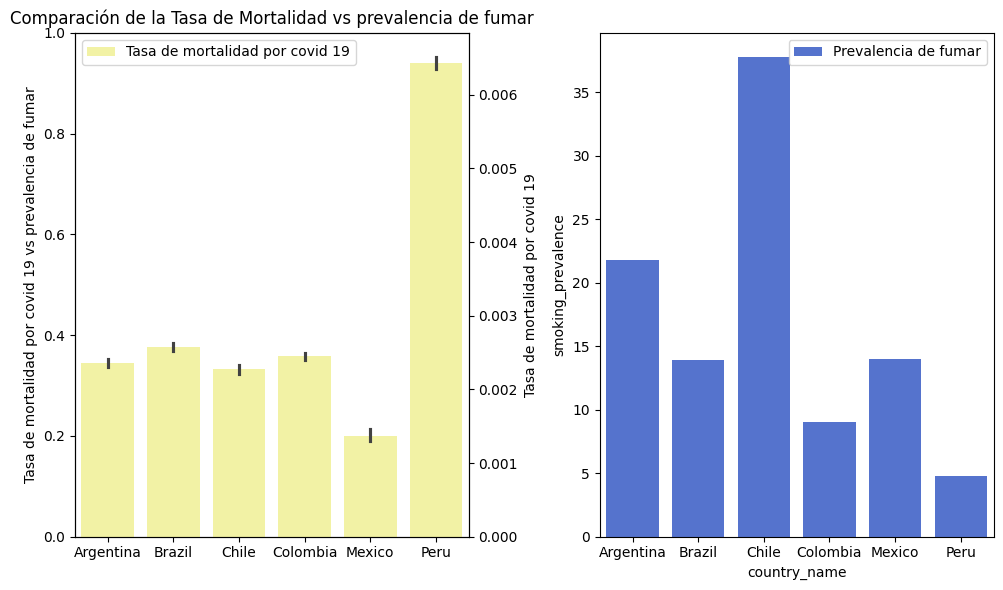

In [116]:
#Comparación de la Tasa de Mortalidad vs prevalencia de fumar.
fig, (ax,ax2) = plt.subplots(1,2, figsize=(10,6))
sns.barplot(data=data_latinoamerica_paises, x=data_latinoamerica_paises['country_name'], y=data_latinoamerica_paises ['smoking_prevalence'],color='royalblue', label='Prevalencia de fumar') 
ax2=ax.twinx()
sns.barplot(data=data_latinoamerica_paises, x=data_latinoamerica_paises['country_name'], y=data_latinoamerica_paises['cumulative_deceased']/data_latinoamerica_paises['population'], color='yellow',label='Tasa de mortalidad por covid 19', ax=ax2,
    alpha=0.4)
plt.xticks(rotation=90)
ax.set_ylabel('Tasa de mortalidad por covid 19 vs prevalencia de fumar')
ax2.set_ylabel('Tasa de mortalidad por covid 19')
plt.title('Comparación de la Tasa de Mortalidad vs prevalencia de fumar')
plt.tight_layout()
plt.show()

Se puede ver que las dos enfermedades afectan a todos los paises, aunque la diabetes es la que mas tasa de mortalidad representa.

En conlusion se ve que los paises que  mas necesitan ayuda son Brasil, Mexico y Colombia son los paises con mas casos y muertes confirmadas ademas son los paises que cuentan con la menor cantidad de vacunas suministradas.

# Avance3

**Evolución semanal  y mensual de casos nuevos*


Se crea un codigo que genera dos gráficos que muestran la evolución de los casos nuevos de COVID-19 en America Latina, uno por semana y otro por año.

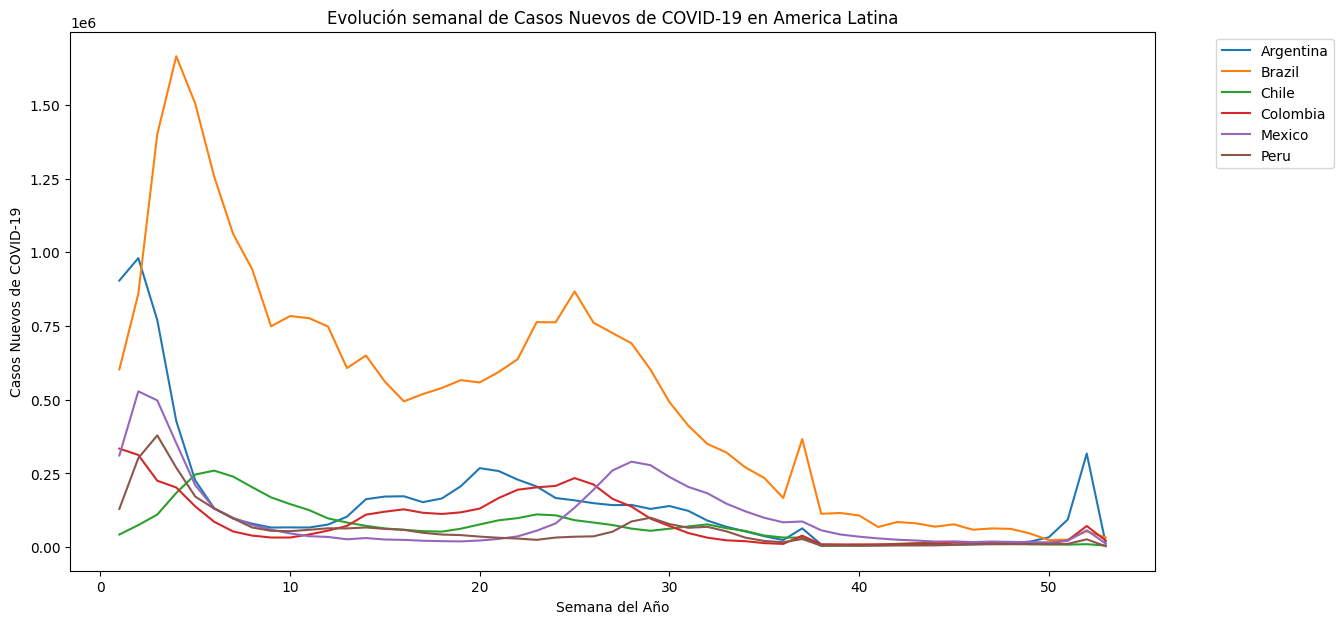

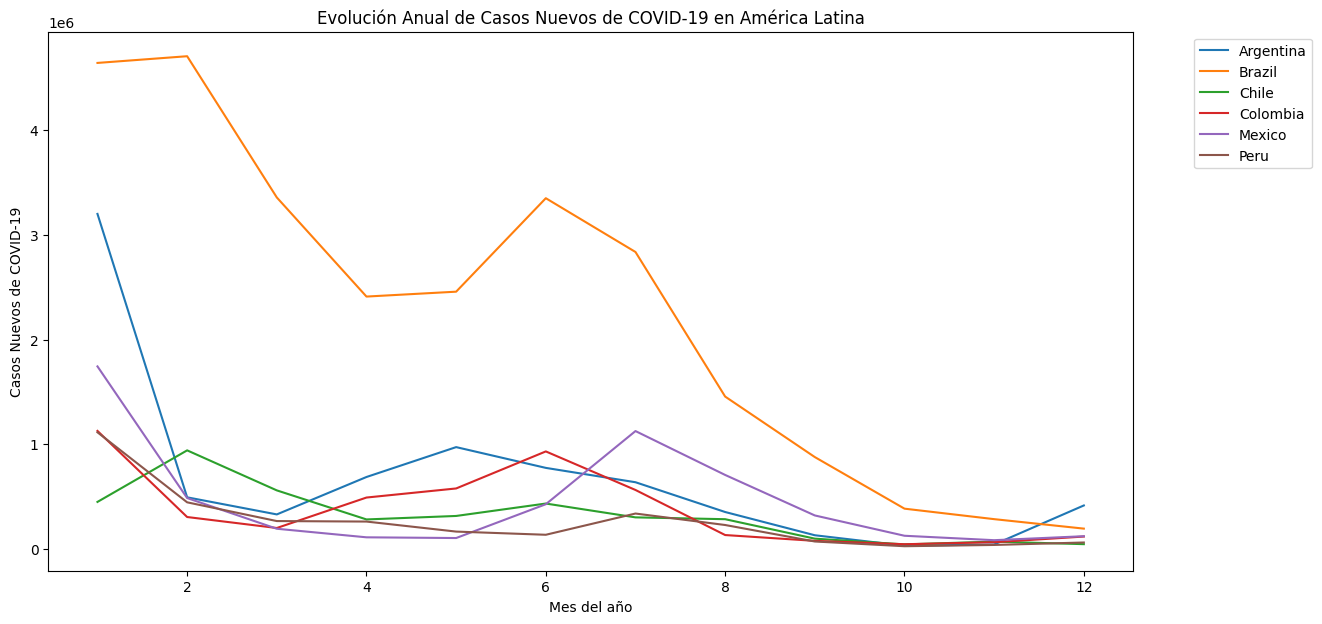

In [117]:
#Evolución de los casos de covid 19 en America Latina

#Por semana
data_latinoamerica_paises['week'] =data_latinoamerica_paises.index.isocalendar().week # Agrega una nueva columna llamada 'week' 
#al DataFrame data_latinoamerica_paises que contiene el numero de semana del año para cada fecha en el indice del dataframe. 
# Esto se hace con el metodo isocalendar() que devuelve una tupla con el año y el numero de semana y el dia de la semana para cada 
# fecha en el indice y luego selecciona el numero de la semana
weekly_cases = data_latinoamerica_paises.groupby(['country_name', 'week'])['new_confirmed'].sum().reset_index()
#Los datos se agruparn por pais y semana, y se suman los nuevos casos confirmados para cada grupo. Se utiliza el metodo reset_index()
#para devorver los datos agrupados a un dataframe plano
plt.figure(figsize=(14,7))# Se crea la figura la figura para el grafico con un tamaño de 14 pulgadas de ancho por 7 pulgadas de alto
for country in weekly_cases['country_name'].unique(): # Este bucle itera sobre cada país único en el DataFrame weekly_cases.
    country_weekly_cases=weekly_cases[weekly_cases['country_name']==country]# Aquí se filtran los datos para obtener solo las filas 
    #correspondientes al país actual en la iteración del bucle.
    plt.plot(country_weekly_cases['week'],country_weekly_cases['new_confirmed'],label=country) #Se traza un gráfico de líneas para 
    #el país actual, utilizando las semanas en el eje x y el número de nuevos casos confirmados en el eje y. Se etiqueta la línea
    # con el nombre del país.

    plt.xlabel('Semana del Año')# Se establece la etiqueta del eje x como "Semana del Año"
    plt.ylabel('Casos Nuevos de COVID-19') # Se establece la etiqueta del eje y como "Casos Nuevos de COVID-19".
    plt.title('Evolución semanal de Casos Nuevos de COVID-19 en America Latina')# titulo del grafico
    plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
# Se añade una leyenda al gráfico que muestra los nombres de los países correspondientes a cada línea. La opción bbox_to_anchor 
#se utiliza para ajustar la posición de la leyenda fuera del área del gráfico.
    plt.show

#por año

data_latinoamerica_paises['month'] = data_latinoamerica_paises.index.month
yearly_cases = data_latinoamerica_paises.groupby(['country_name', 'month'])['new_confirmed'].sum().reset_index()
plt.figure(figsize=(14, 7))
for country in yearly_cases['country_name'].unique():
    country_yearly_cases = yearly_cases[yearly_cases['country_name'] == country]
    plt.plot(country_yearly_cases['month'], country_yearly_cases['new_confirmed'], label=country)

plt.xlabel('Mes del año')
plt.ylabel('Casos Nuevos de COVID-19')
plt.title('Evolución Anual de Casos Nuevos de COVID-19 en América Latina')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()





Se puede observar que en las primeras semanas y meses del año hay un pico alto de casos lo cual se puede deber a que son tiempos de fiesta y vacaciones, para mediados de año tambien se ve que suben los casos pero en comparación son un poco mas bajos.

**Progreso de la vacunación por país*


Este código genera un gráfico de barras horizontal que muestra el progreso de la vacunación por país en América Latina. Aquí está la descripción del código:

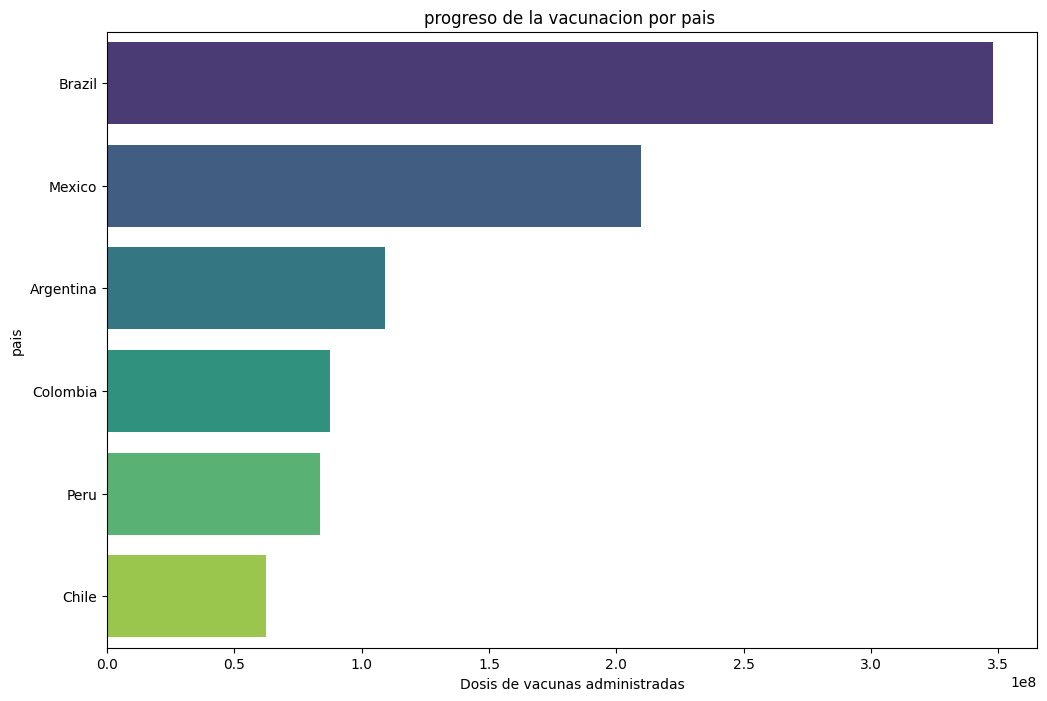

In [118]:
# progreso de la vacunación por pais

vaccination_data=data_latinoamerica_paises.groupby("country_name")["cumulative_vaccine_doses_administered"].max().sort_values(ascending=False)
#Agrupa los dato por nombre de pais y calcula el maximo de dosis de vacunas administradas acumuladas por pais y ordena los datos asendentemete
plt.figure(figsize=(12,8))# crea la figura
sns.barplot(x=vaccination_data.values, y= vaccination_data.index, hue= vaccination_data.index, palette= "viridis")
#Se genera un grafico de barras Los valores de las barras se toman de los valores de vaccination_data, mientras que los nombres de los países 
#se usan para etiquetar el eje y. La paleta de colores 'viridis' se utiliza para colorear las barras. El parámetro hue se establece en el 
# índice de vaccination_data, lo que significa que cada barra tendrá un color distinto según el país.
plt.xlabel("Dosis de vacunas administradas")#etiqueta del eje x
plt.ylabel("pais")#etiqueta del eje y
plt.title("progreso de la vacunacion por pais ") # titulo del grafico
plt.show() #mostrar grafico

El país con mayor dosis administradas es Brasil seguido de Mexico, Argentina, Colombia, Peru y Chile.

**Nuevos casos y temperatura promedio*

Este codigo crea  un gráfico que muestra  la relación entre los nuevos casos de COVID-19 y la temperatura promedio a lo largo del tiempo en América Latina. 

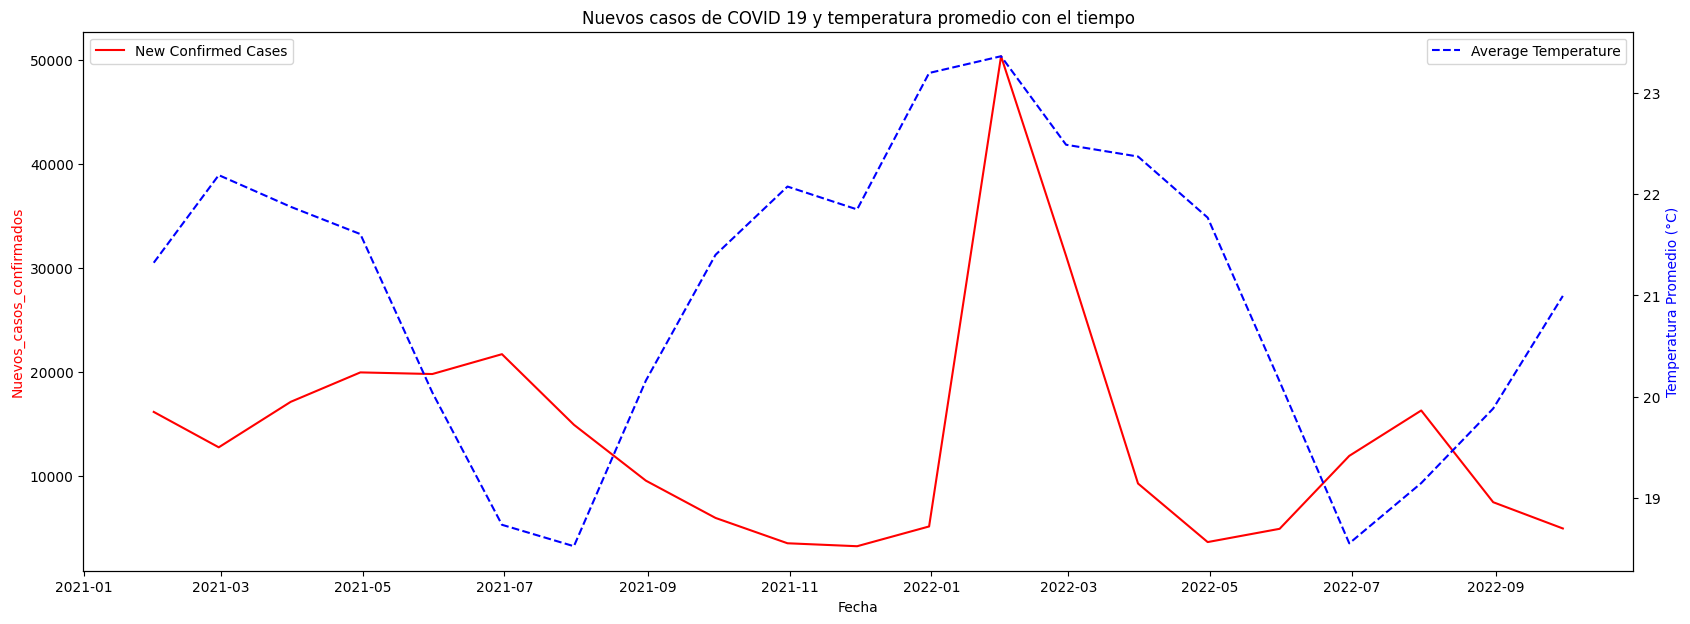

In [119]:
# Graficamos la relación entre la temperatura promedio y los nuevos casos confirmados de COVID-19

plt.figure(figsize=(20,7))# Se crea la figura
ax1 = plt.gca() # Se obtiene el eje actual ('ax1)
ax2 = ax1.twinx() # : Se crea un segundo eje y (ax2) que comparte el mismo eje x que ax1.
ax1.plot(data_latinoamerica_paises.resample('ME').mean(numeric_only=True).index, data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['new_confirmed'],color='red', label='New Confirmed Cases')
#Se traza un gráfico de líneas en ax1 utilizando los datos de 'new_confirmed' (nuevos casos confirmados de COVID-19) en el eje y y las fechas en el eje x. Los datos se han re-muestreado a intervalos mensuales
# y se calcula la media para obtener valores mensuales. La línea se representa en color rojo y se le asigna una etiqueta 'New Confirmed Cases'.
ax2.plot(data_latinoamerica_paises.resample('ME').mean(numeric_only=True).index, data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['average_temperature_celsius'],color='blue', label='Average Temperature', linestyle='--')
#Se traza otro gráfico de líneas en ax2 utilizando los datos de 'average_temperature_celsius' (temperatura promedio en grados Celsius) en el eje y y las fechas en el eje x. Los datos se han re-muestreado a intervalos mensuales y se 
#calcula la media. La línea se representa en color azul y se le asigna una etiqueta 'Average Temperature'. Además, se establece un estilo de línea discontinua (linestyle='--').
ax1.set_xlabel('Fecha')#Se establece la etiqueta del eje x para ax1.
ax1.set_ylabel('Nuevos_casos_confirmados', color='red')#Se establece la etiqueta del eje y para ax1. El texto de la etiqueta se colorea de rojo
ax2.set_ylabel('Temperatura Promedio (°C)', color='blue')#Se establece la etiqueta del eje y para ax2. El texto de la etiqueta se colorea de azul.
plt.title('Nuevos casos de COVID 19 y temperatura promedio con el tiempo')#Se establece el título del gráfico.
ax1.legend(loc='upper left')#Se agrega una leyenda al gráfico en ax1, ubicada en la esquina superior izquierda.
ax2.legend(loc='upper right')#Se agrega una leyenda al gráfico en ax2, ubicada en la esquina superior derecha.
plt.show() # Se muestra el gráfico.

 # 'resample()' se usa para cambiar la frecuencia de los datos de la serie de tiempo. 'ME': Este es el parámetro que se pasa a 
 #resample(), lo que indica que se desea remuestrear los datos a intervalos mensuales (M) y que se usará el final del mes (E) como el
 # punto de referencia para cada intervalo. Otras opciones comunes incluyen 'D' para días y 'A' para años.

Podemos observar que la temperatura media a ido aumentando y los casos confirmado han ido disminuyendo sin embargo hubo un pico antes del mes de marzo pero disminuyo rapidamente, esto puede ser por la cantidad de vacunas administradas o por la cantidad de personas que se han ido vacunando.

Cada país tienen un impacto debido a la densidad de poblacion por lo que vamos a analizar la densidad de poblacion en cada pais.



**Impacto de la Urbanización en la Propagación del Covid-19*

En este grafico vamos a calcular el porcentaje de población urbana para cada país en America Latina, agrupa los datos por país y selecciona el ultimo valor de cada país y traza un grafico de barras horizontal que muestar el porcentaje de población urbana de cada país.

C:\Users\GSR AUTOS\AppData\Local\Temp\ipykernel_15336\3945575483.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=urban_cases['urban_population_porcentage'], y=urban_cases.index, palette='viridis')


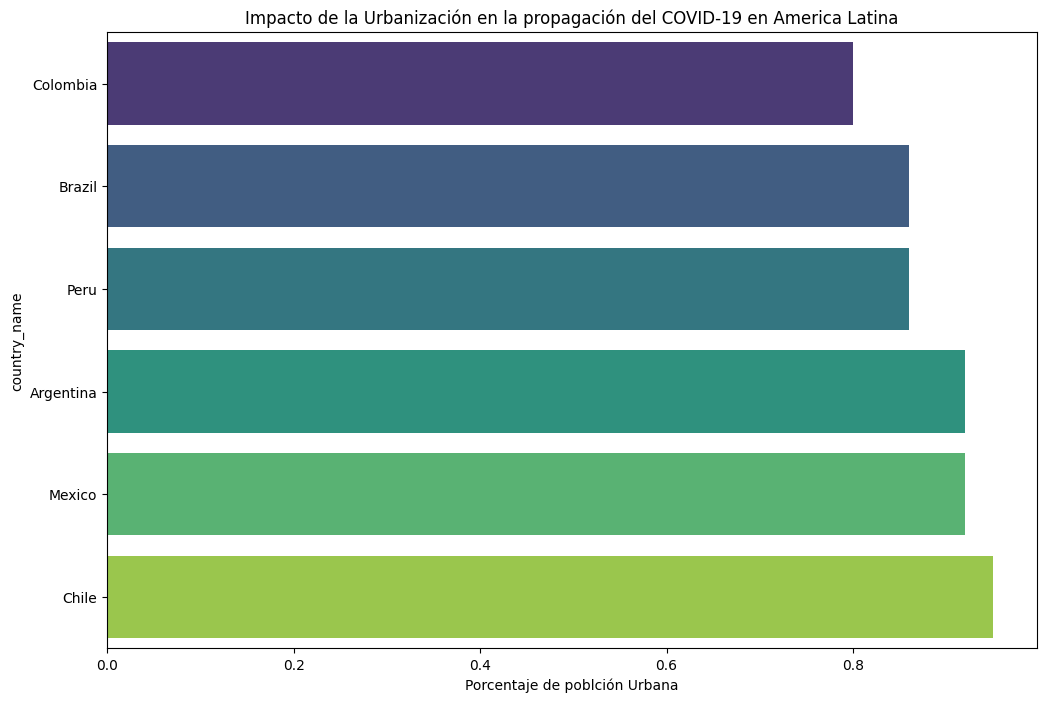

In [120]:
data_latinoamerica_paises['urban_population_porcentage']=(data_latinoamerica_paises['population_urban']/data_latinoamerica_paises['population']).round(2)
# Calcula el porcentaje de población urbana para cada país y se almacena en una nueva columna llamada 'urban_population_porcentage' en el dataframe 'data_latinoamerica_paises'
urban_cases = data_latinoamerica_paises.groupby('country_name').last().sort_values(by='urban_population_porcentage')
# Se agrupan los datos por país y se selecciona el ultimo valor de cada país utilizado 'last()' y ordena 
plt.figure(figsize=(12,8)) # Se crea figura para el gráfico
sns.barplot(x=urban_cases['urban_population_porcentage'], y=urban_cases.index, palette='viridis')
# muestra porcentaje de poblacion urbana y nombre de los paises con palette='viridis' se da color a cda barra
plt.xlabel('Porcentaje de poblción Urbana')#Etiqueta eje x
plt.title('Impacto de la Urbanización en la propagación del COVID-19 en America Latina')#Titulo del gráfico
plt.show()#Mostrar gráfico

El pais con mayor propagación fue Chile, aunque es extraño  ya que Chile fue uno de los paises que mejor manejo la pandemia, sin embarogo esto puede ser debido a la densidad de población en Chile.

**Distribución de la Población por Edad en Países*

Este grafico tiene como objetivo analizar la distribución de la población por grupos de edad en los países con altas tasas de
mortalidad por COVID-19 en América Latina. 

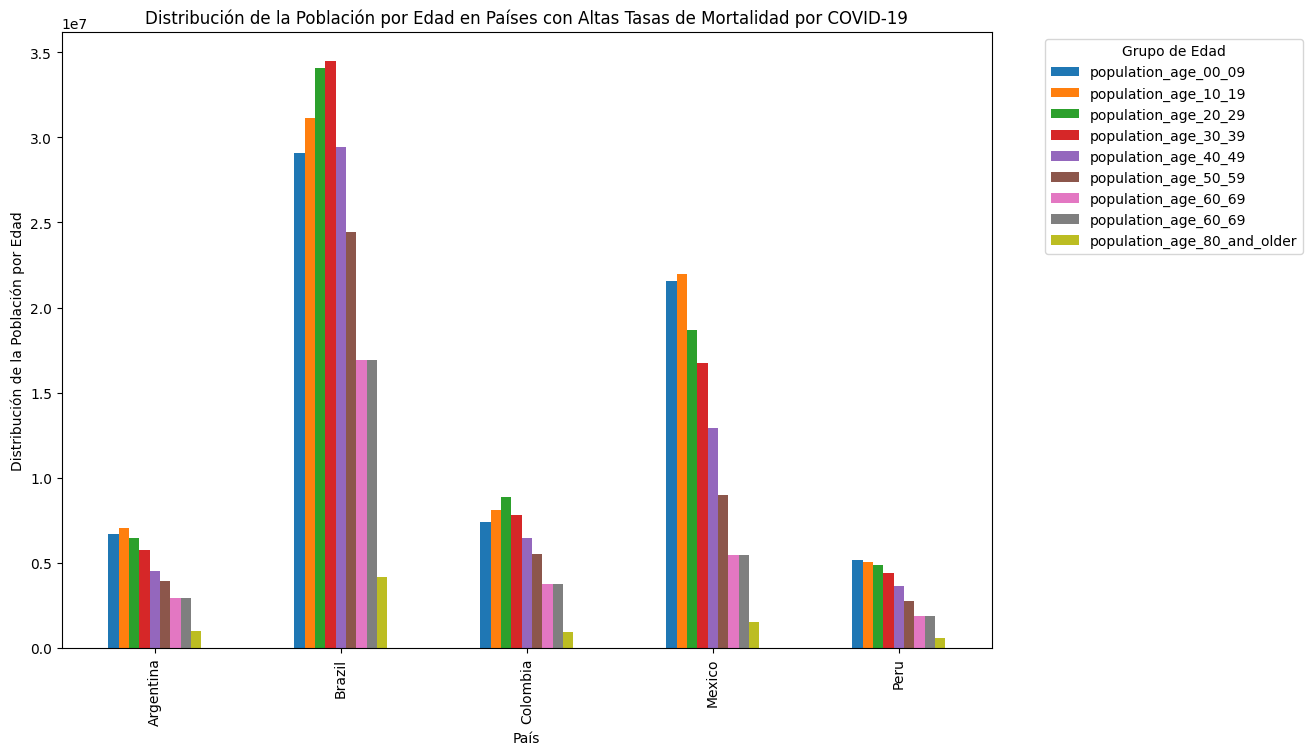

In [121]:
# Distribución de la Población por Edad en Países

high_mortality_countries = data_latinoamerica_paises.groupby('country_name') ['cumulative_deceased'].max().sort_values (ascending=False). head (5).index 
#Se identifican los paises con las 5 mayores tasas de mortalidad acumuladas en America Latina.  Se agrupan los datos por nombre de país y se selecciona el
# valor máximo de la columna 'cumulative_deceased' (defunciones acumuladas) para cada país. Luego, estos valores se ordenan en orden descendente y se 
#seleccionan los cinco primeros países. Finalmente, se obtienen los índices de estos países.
age_groups = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69', 'population_age_60_69', 'population_age_80_and_older'] 
#Se define una lista de grupos de edad que se utilizarán para calcular la distribución de la población por edad en los países seleccionados.
age_distribution = data_latinoamerica_paises [data_latinoamerica_paises['country_name'].isin (high_mortality_countries)].groupby('country_name') [age_groups].mean()
#Se filtran los datos para incluir solo los países con altas tasas de mortalidad por COVID-19 utilizando el método isin() en la columna 'country_name'. Luego, se 
# agrupan los datos por nombre de país y se calcula la media de los grupos de edad para cada país.

age_distribution.plot(kind='bar', stacked=False, figsize=(12, 8))# Se traza un gráfico de barras para visualizar la distribución de la población por grupos
# de edad en los países seleccionados. La opción stacked=False indica que las barras no se apilarán una encima de la otra, sino que estarán una al lado de la otra
plt.xlabel('País')# Etiqueta eje x
plt.ylabel('Distribución de la Población por Edad')#Etiqueta eje y
plt.title('Distribución de la Población por Edad en Países con Altas Tasas de Mortalidad por COVID-19') #titulo
plt.legend (bbox_to_anchor= (1.05, 1), loc='upper left', title='Grupo de Edad')
#Se agrega una leyenda al gráfico, colocándola fuera del área del gráfico (bbox_to_anchor=(1.05, 1)), en la esquina superior izquierda
#  (loc='upper left'). Se especifica el título de la leyenda como 'Grupo de Edad'.
plt.show()#Muestra el gráfico


Se muestra la desigualdad en cantidades de población por grupos de edad en los paises seleccionados. Se ve que la poblacion entre 10 y 30 años de edad tiene altas tasas de mortalidad.

Chile es el pais con las tasas mas bajas de mortalidad en America Latina y nuevamente se ve que Brasil, Mexico y Colombia son los paises con la tasa mas alta de mortalidad  por covid 19.

**Comparación de Estrategias de Vacunación en América Latina*


Este codigo  tiene como objetivo crear un gráfico para comparar las estrategias de vacunación en América Latina mediante la visualización de la 
cantidad de dosis administradas por cada 100 personas en cada país. 

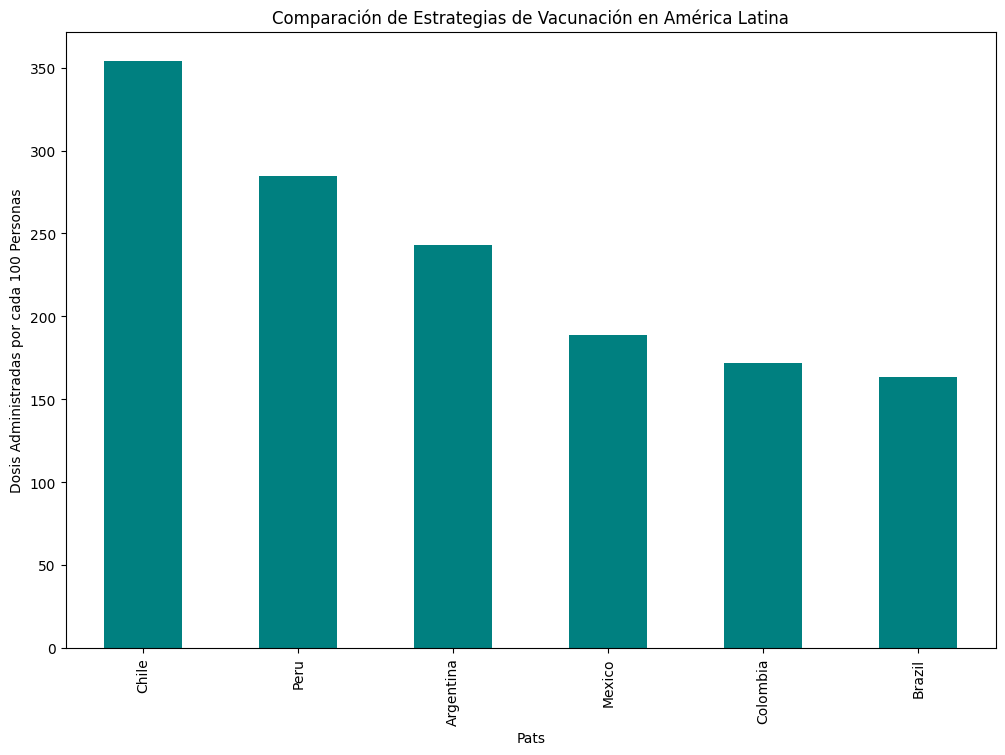

In [122]:
#Comparación de Estrategias de Vacunación en América Latina
vaccination_strategy = data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max() /data_latinoamerica_paises.groupby('country_name')['population'].max()*100 
#Se calcula la estrategia de vacunación para cada país dividiendo el número máximo de dosis de vacunas administradas acumuladas entre la población máxima del país, y luego multiplicando el resultado
# por 100 para obtener la cantidad de dosis administradas por cada 100 personas.
vaccination_strategy.sort_values (ascending=False). plot (kind='bar', figsize=(12, 8), color='teal') 
#Se traza un gráfico de barras utilizando los datos de la estrategia de vacunación. Los países se ordenan en función de su estrategia
#de vacunación de mayor a menor. El color de las barras se establece en 'teal'.
plt.xlabel('Pats')# Etiqueta del eje x
plt.ylabel('Dosis Administradas por cada 100 Personas') # Etiqueta del eje y
plt.title('Comparación de Estrategias de Vacunación en América Latina')#titulo
plt.show()#mostrar gráfico


Nuevamente vemos el buen resultado de Chile y fallas en Colombia, Mexico y Brasil. con esto 

**Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad*


Este script realiza dos visualizaciones utilizando Seaborn para comparar la prevalencia de diabetes y tabaquismo en países con altas y bajas tasas de mortalidad por COVID-19. 

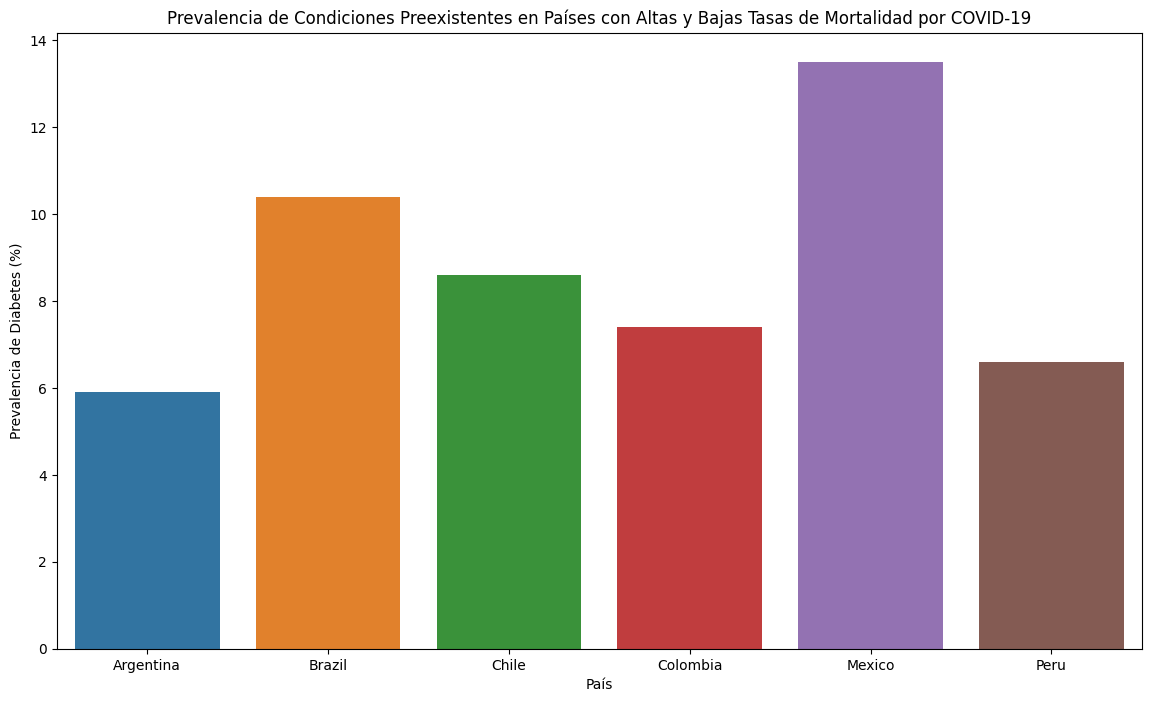

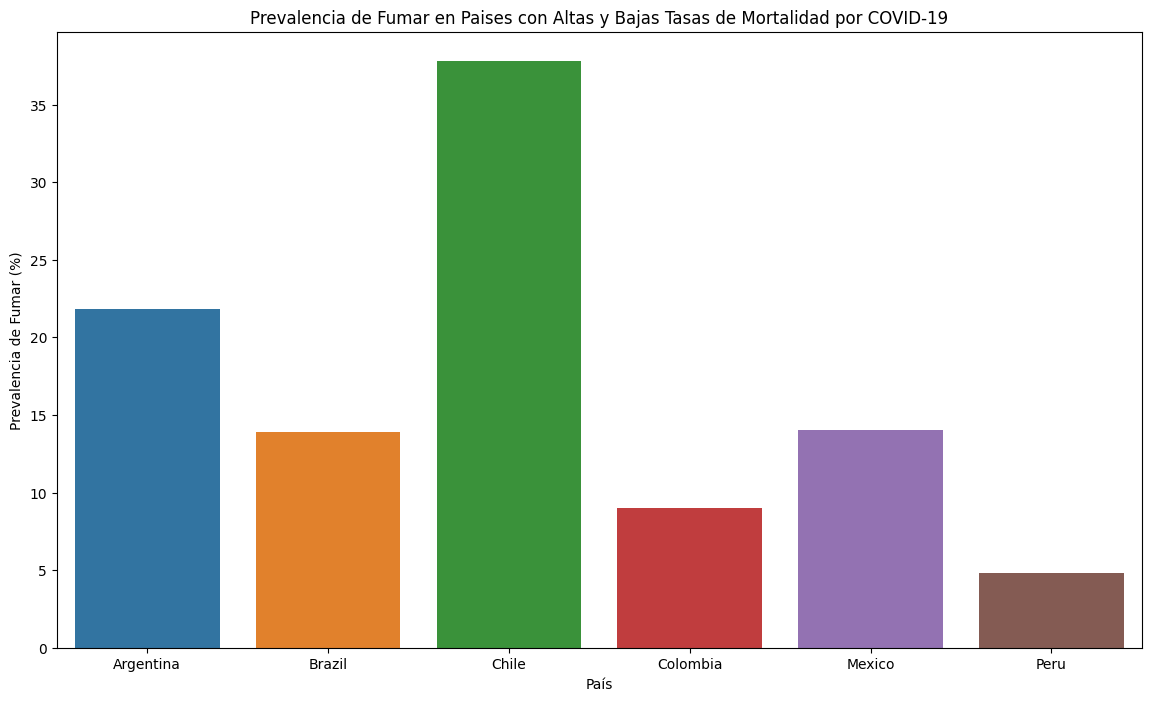

In [123]:
# Prevalencia de diabetes
top_countries = data_latinoamerica_paises.groupby('country_name')['cumulative_deceased'].max().nlargest (5).index 
bottom_countries = data_latinoamerica_paises.groupby('country_name') ['cumulative_deceased'].max().nsmallest (5).index 
#Se seleccionan los cinco países con las mayores tasas de mortalidad acumulada por COVID-19 (top_countries) y los cinco 
# países con las menores tasas de mortalidad acumulada (bottom_countries). Esto se hace agrupando los datos por país, 
#calculando el máximo de defunciones acumuladas para cada país y luego seleccionando los cinco mayores y menores valores.
conditions_data = data_latinoamerica_paises [data_latinoamerica_paises['country_name'].isin(top_countries.union (bottom_countries))] 
#Se filtran los datos para incluir solo los países con las mayores y menores tasas de mortalidad acumulada por COVID-19. Esto se hace
# utilizando el método isin() en la columna 'country_name' y pasando la unión de los conjuntos de países con mayores y menores
#  tasas de mortalidad.
plt.figure(figsize=(14, 8)) #Se crea la figura
sns.barplot(data=conditions_data, x='country_name', y='diabetes_prevalence', hue='country_name')# Trazo de gráfico de barras
plt.xlabel('País') # etiqueta eje x
plt.ylabel('Prevalencia de Diabetes (%)') # # etiqueta eje x
plt.title('Prevalencia de Condiciones Preexistentes en Países con Altas y Bajas Tasas de Mortalidad por COVID-19')# etiqueta titulo
plt.show() #Mostrar grafico

# Prevalencia de fumar.
plt.figure(figsize=(14, 8))
sns.barplot(data=conditions_data, x='country_name', y='smoking_prevalence', hue='country_name')
plt.xlabel('País')
plt.ylabel('Prevalencia de Fumar (%)')
plt.title('Prevalencia de Fumar en Paises con Altas y Bajas Tasas de Mortalidad por COVID-19')
plt.show()


En el gráfico anterior se identifica que la diabetes  afecta mucho mas a Mexico y Brasil y respecto a fumar los que mas inciden son Chile y Argentina por lo que se podria decir que estos paises son los que mas han sufrido por el fumar.

**Tasa de Crecimiento (%)*


Este código calcula y compara la tasa de letalidad del COVID-19 entre los países de América Latina y luego traza un gráfico de barras para visualizar estas tasas. 

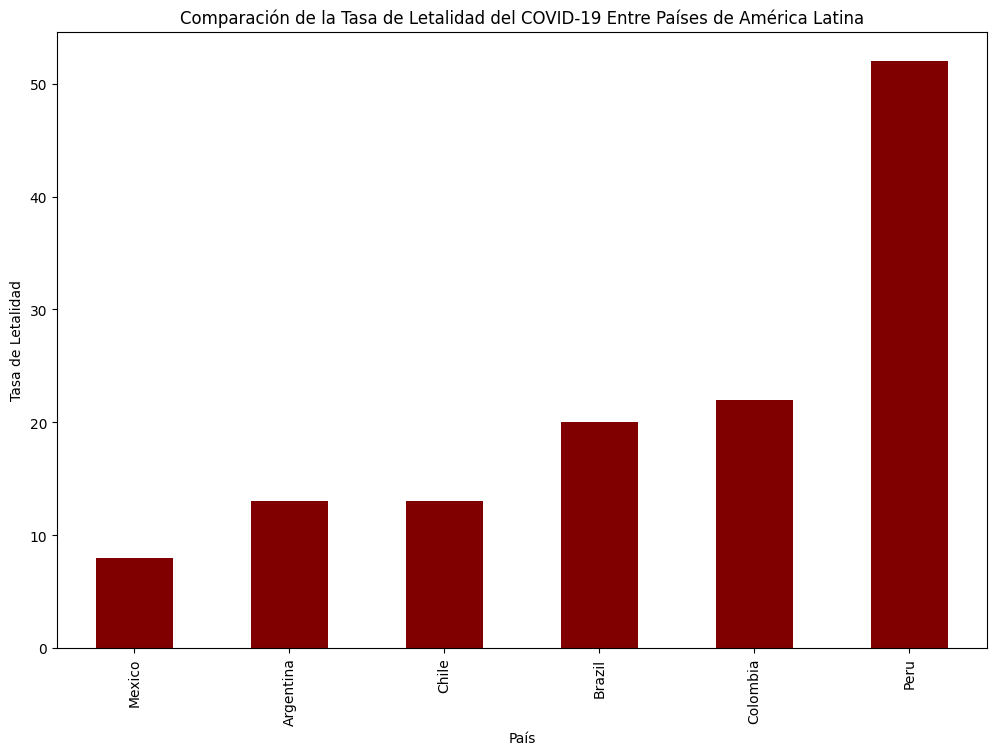

In [124]:
data_latinoamerica_paises ['case_fatality_rate'] = ((data_latinoamerica_paises['cumulative_deceased']/data_latinoamerica_paises['cumulative_confirmed'])*1000).round(0) 
#Se calcula la tasa de letalidad del COVID-19 para cada país dividiendo el número acumulado de fallecimientos entre el número acumulado de casos 
#confirmados. Esta tasa se almacena en una nueva columna llamada 'case_fatality_rate' en el DataFrame data_latinoamerica_paises
fatality_rates = data_latinoamerica_paises.groupby('country_name') ['case_fatality_rate'].last().sort_values()
#Se agrupan los datos por país y se selecciona el último valor de la tasa de letalidad para cada país. Luego, los 
#datos se ordenan en orden ascendente según la tasa de letalidad. last() selecciona el ultimo valor de la tasa
#sort_values() ordena la columna 'case_fatality_rate'
plt.figure(figsize=(12, 8))# Se crea la figura
fatality_rates.plot(kind='bar', color='maroon') #Trazo de grafico de barras
plt.xlabel('País')
plt.ylabel('Tasa de Letalidad')
plt.title('Comparación de la Tasa de Letalidad del COVID-19 Entre Países de América Latina')
plt.show()


Se ve que todos los paises han tenido un comportamiento en cuanto a la fatalidad sin embargo de acuerdo a las graficas anteriores la tasa de letalidad ha bajado. 

Los casos nuevos y las muertes nuevas han bajado lo cual podria ser debido a las medidas tomadas por el gobierno y la vacunación.

**Relación entre la Cobertura de Vacunación y la Reducción de Casos*

Este codigo  muestra un gráfico de la relación entre la cobertura de vacunación y la reducción de COVID-19 en America Latina a lo largo del tiempo.

C:\Users\GSR AUTOS\AppData\Local\Temp\ipykernel_15336\1929203822.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_latinoamerica_paises.resample('M').mean(numeric_only=True)['new_confirmed'].plot(ax=ax1, color='blue', label='Casos Nuevos')
C:\Users\GSR AUTOS\AppData\Local\Temp\ipykernel_15336\1929203822.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_latinoamerica_paises.resample('M').mean(numeric_only=True)['percentage vaccinated'].plot(ax=ax2, color='green', label='Porcentaje de la Población Vacunada')


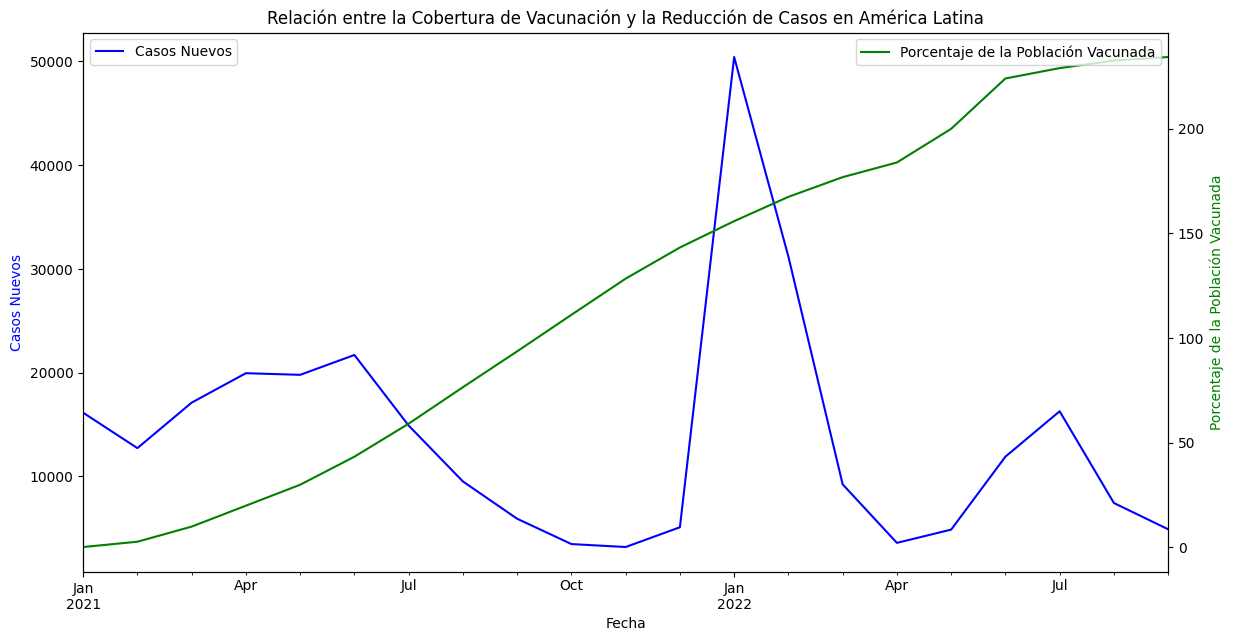

In [127]:
# Como evoluciona la vacunación en América Latina y la reducción de casos de COVID-19
plt.figure(figsize=(14, 7))# Se genera el gráfico 
ax1 = plt.gca()# Se asigna el primer eje como eje principal
ax2 = ax1.twinx()# Se cra un segundo eje que comparte el mismo eje x

#crea porcentajes de vacunacion
data_latinoamerica_paises['percentage vaccinated'] = (data_latinoamerica_paises['cumulative_vaccine_doses_administered'] /data_latinoamerica_paises['population'])*100
#  Se agrupan los datos por mes (resample('M')) y se calcula la media de las variables numéricas (mean(numeric_only=True)).
data_latinoamerica_paises.resample('M').mean(numeric_only=True)['new_confirmed'].plot(ax=ax1, color='blue', label='Casos Nuevos')
data_latinoamerica_paises.resample('M').mean(numeric_only=True)['percentage vaccinated'].plot(ax=ax2, color='green', label='Porcentaje de la Población Vacunada')   

ax1.set_xlabel('Fecha')
ax1.set_ylabel('Casos Nuevos', color='blue')
ax2.set_ylabel('Porcentaje de la Población Vacunada', color='green')
ax1.set_title('Relación entre la Cobertura de Vacunación y la Reducción de Casos en América Latina')
ax1.legend (loc='upper left')
ax2.legend (loc='upper right') 
plt.show()



A medida que la administracion de vacunas ha aumentado el numero de casos ha disminuido a lo largo del tiempo.

**Análisis Temporal de la Mortalidad*


Este codigo muestra un grafico que traza el análisis temporal de la tasa de mortalidad por COVID-19 en América Latina. 

C:\Users\GSR AUTOS\AppData\Local\Temp\ipykernel_15336\1181681717.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=data_latinoamerica_paises, x='date', y='mortality_rate', estimator='mean', ci=None)


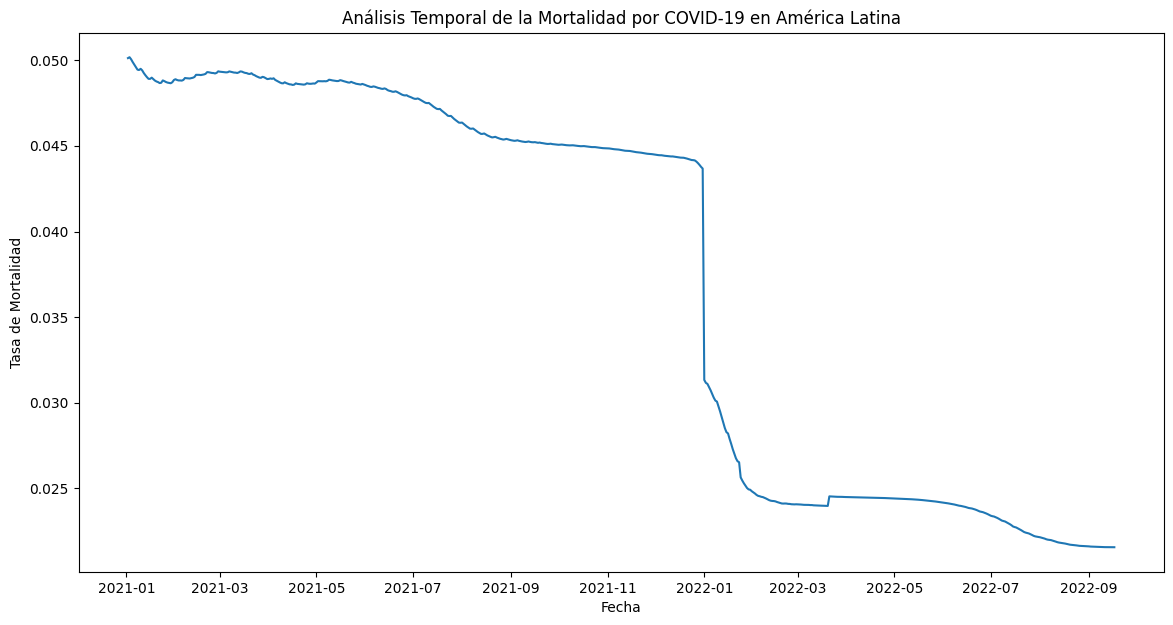

In [131]:
# cómo evolucionó la mortalidad
data_latinoamerica_paises['mortality_rate'] = data_latinoamerica_paises ['cumulative_deceased'] /data_latinoamerica_paises['cumulative_confirmed'] 
# Calcula la tasa de mortalidad dividiendo el número acumulado de fallecidos entre el número acumulado de casos confirmados de COVID-19 en América Latina.
#  El resultado se almacena en una nueva columna llamada 'mortality_rate' en el DataFrame data_latinoamerica_paises.
plt.figure(figsize=(14, 7)) #Crea la figura
sns.lineplot(data=data_latinoamerica_paises, x='date', y='mortality_rate', estimator='mean', ci=None)
#Traza un gráfico de lineas con la columna 'date' y la columna 'mortaly_rate' , el parametro estimator='mean' calcula la media de los
#valores en cada periodo del tiempo y ci=None evita que se muestren intervalos de confianza en el gráfico.
plt.title('Análisis Temporal de la Mortalidad por COVID-19 en América Latina')# Titulo del Gráfico
plt.xlabel('Fecha')#Etiquta del eje x
plt.ylabel('Tasa de Mortalidad')#Etiqueta del eje y
plt.show()#mostrar el grafico


**Evolución de Casos Activos vs. Recuperados*


Este codigo crea un gráfico donde  se visualiza la evolución de los casos activos y recuperados de COVID-19 en América Latina a lo largo del tiempo.

C:\Users\GSR AUTOS\AppData\Local\Temp\ipykernel_15336\1691361461.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sns.lineplot(data=data_latinoamerica_paises.resample('M').mean(numeric_only=True), x='date', y='active_cases', label='Casos Activos')
C:\Users\GSR AUTOS\AppData\Local\Temp\ipykernel_15336\1691361461.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  sns.lineplot(data=data_latinoamerica_paises.resample('M').mean(numeric_only=True), x='date', y='cumulative_recovered', label='Casos Recuperados')


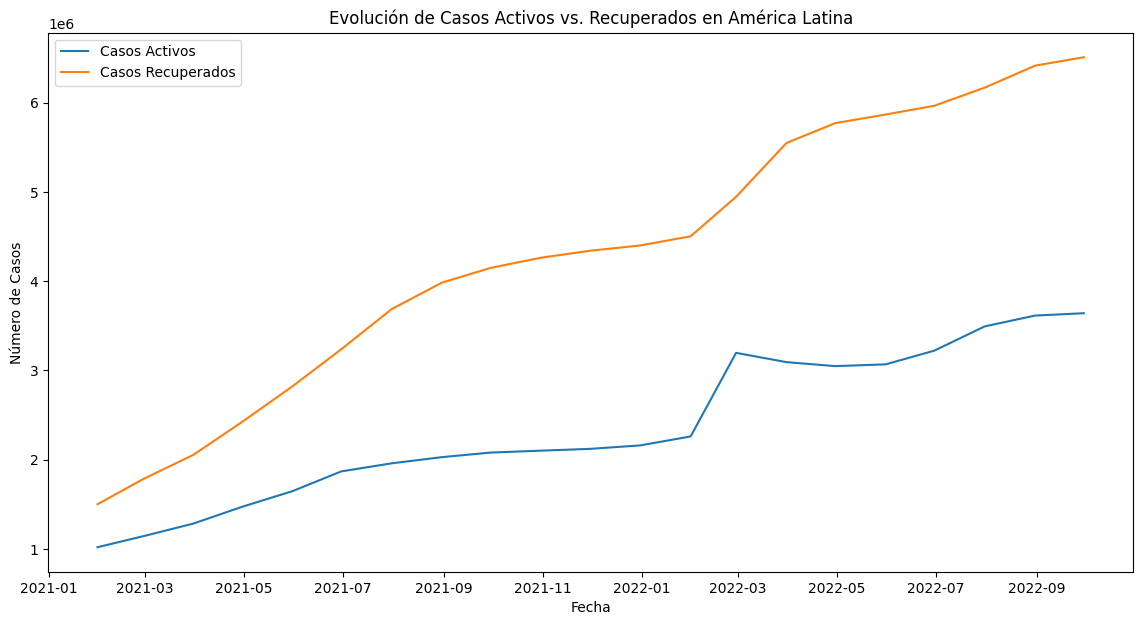

In [135]:
#como evolucionan los casos activos y recuperados en América Latina
data_latinoamerica_paises['active_cases'] = data_latinoamerica_paises['cumulative_confirmed'] - data_latinoamerica_paises['cumulative_deceased'] - data_latinoamerica_paises['cumulative_recovered']
# : Se calcula el número de casos activos restando el total de casos confirmados por COVID-19 de la suma de los fallecidos y los recuperados. Esto se realiza mediante la fórmula:
plt.figure(figsize=(14, 7)) # Crea figura
sns.lineplot(data=data_latinoamerica_paises.resample('M').mean(numeric_only=True), x='date', y='active_cases', label='Casos Activos')
#Se utiliza el método sns.lineplot() para trazar la media mensual de los casos activos (active_cases) en el eje y, y la fecha (date) en el eje x.
sns.lineplot(data=data_latinoamerica_paises.resample('M').mean(numeric_only=True), x='date', y='cumulative_recovered', label='Casos Recuperados')
#Se utiliza nuevamente el método sns.lineplot() para trazar la media mensual de los casos recuperados (cumulative_recovered) en el eje 
plt.xlabel('Fecha') 
plt.ylabel('Número de Casos')
plt.title('Evolución de Casos Activos vs. Recuperados en América Latina')
plt.legend()#Agrega leyenda en el gráfico 
plt.show()


Los casos activos han disminuido y los recuperados han aumentado, esto puede ser debido a la vacunación y a las medidas tomadas por cada gobierno.

**Comparación de la Situación Actual (Contexto de los datos)*

Este codigo  hace un gráfico de barras apiladas que compara la situacion actual del covid19 entre paises de America Latina

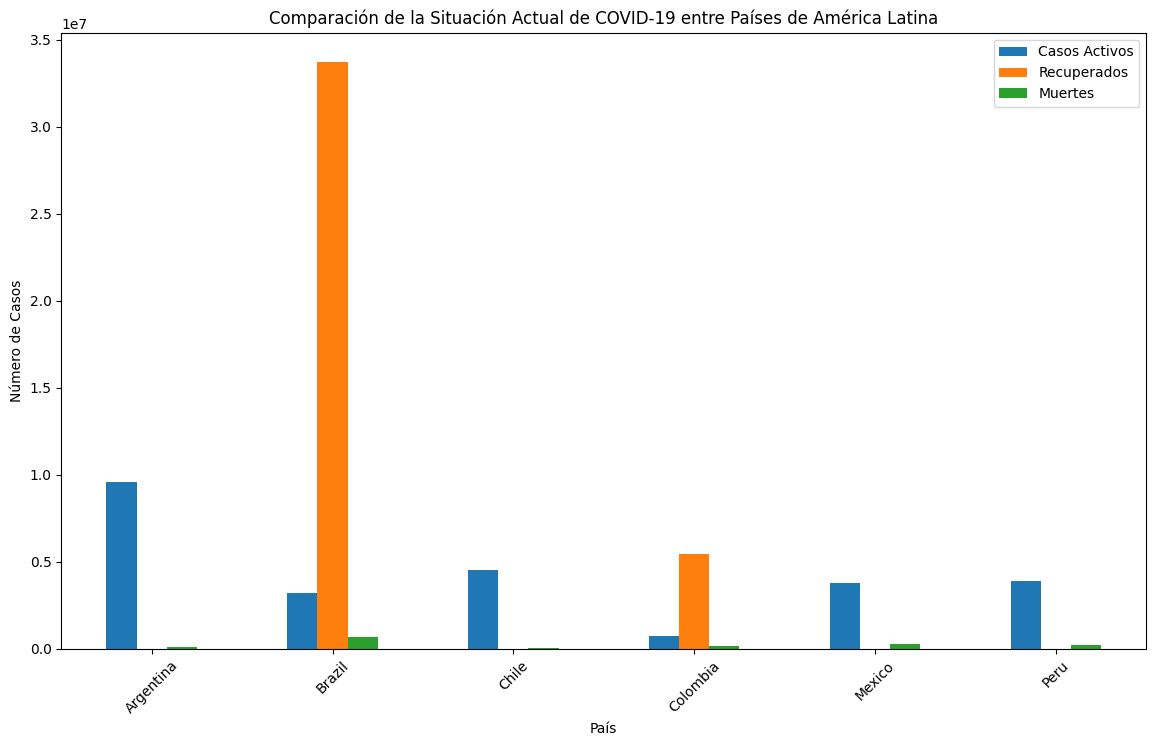

In [136]:
#No se tienen datos pero hay datos de recuperados y muertes en algunos paises
current_situation = data_latinoamerica_paises.groupby('country_name').max()[['active_cases', 'cumulative_recovered', 'cumulative_deceased']] 
# Agrupa por el nombre del pais , calcula la suma de las columnas 'active_cases', 'cumulative_recovered', 'cumulative_deceased' par cada país
# Se crea un nuevo dataframe current_situation con los totales de casos activos, recuperados y fallecidos para cada país.
current_situation.plot(kind='bar', stacked=False, figsize=(14, 8))#utiliza el metodo plot() del dataframe para generar gráfico de barras
#stacked significa que no se apilaran las barras (cada gráfica representa una cantidad independiente, no una acumulación)
plt.title('Comparación de la Situación Actual de COVID-19 entre Países de América Latina')
plt.xlabel('País')
plt.ylabel('Número de Casos')
plt.legend (['Casos Activos', 'Recuperados', 'Muertes'])
plt.xticks(rotation=45)
plt.show()


La empresa farmaceutica debe expandirse en Brasil, Mexico y Colombia, son los paises que mas muertes y casos  confirmados presenta y son los paises que menos dosis de vacunas administradas han tenido.

In [137]:
#Con esto, 'date' volverá a ser una columna en el DataFrame data_latinoamerica_paises y el índice se restablecerá al índice numérico
# predeterminado.
data_latinoamerica_paises.reset_index(inplace=True)


Se crea una ultima base filtrada para realizar las visualizaciones del análisis en Power BI

In [138]:
path_nuevo_csv = 'DatosFinales.csv'

data_latinoamerica_paises.to_csv(path_nuevo_csv, index=False)

In [2]:
data = pd.read_csv('DatosFinales.csv')

In [140]:
data['date']=pd.to_datetime(data['date'])
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3744 entries, 0 to 3743
Data columns (total 66 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   date                                   3744 non-null   datetime64[ns]
 1   location_key                           3744 non-null   object        
 2   country_code                           3744 non-null   object        
 3   country_name                           3744 non-null   object        
 4   new_confirmed                          3744 non-null   int64         
 5   new_deceased                           3744 non-null   int64         
 6   cumulative_confirmed                   3744 non-null   int64         
 7   cumulative_deceased                    3744 non-null   int64         
 8   cumulative_vaccine_doses_administered  3744 non-null   int64         
 9   population                             3744 non-null   int64   

# Extra Credit

Se crea un mapa interactivo utilizando la libreria 'folium.plugins', muestra la distribución geografica de varios daros relacionados con la pandemia de COVID-19 en paises de America Latina.



In [69]:
# mapa para ver la distribución de casos confirmado, muertes, vacuna y recuperados
import folium
from folium.plugins import HeatMap

# Se definen las columnas de interés que se utilizarán para crear el mapa. Estas columnas incluyen la latitud, longitud 
# y datos acumulados de  casos confirmados, fallecidos, dosis de vacunas administradas y recuperados.
columns = ['latitude', 'longitude', 'cumulative_confirmed', 'cumulative_deceased', 'cumulative_vaccine_doses_administered', 'cumulative_recovered'] 
# Se crea un nuevo DataFrame llamado data_map, que contiene solo las filas de data_latinoamerica_paises 
# que no tienen valores nulos en las columnas especificadas.
data_map = data_latinoamerica_paises[columns].dropna()


 # Se crea un mapa utilizando Folium con una ubicación central en América Latina y un nivel de zoom inicial de 3.
map = folium.Map(location=(-14.235004, -51.92528), zoom_start=3)


#Creamos un mapa de calor para los casos confirmados
heat_map_confirmed = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_confirmed']], radius=15)
map.add_child(heat_map_confirmed)
#Creamos un mapa de calor para las muertes
heat_map_deceased = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_deceased']], radius=15) 
map.add_child(heat_map_deceased)
#Creamos un mapa de calor para las vacunas administradas
heat_map_vaccine = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_vaccine_doses_administered']], radius=15) 
map.add_child(heat_map_vaccine)
# Creamos un mapa de calor para los recuperados
heat_map_recovered = HeatMap(data=data_map[['latitude', 'longitude', 'cumulative_recovered']], radius=15) 
map.add_child(heat_map_recovered)
map.save('mapa.html')#  Se guarda el mapa como un archivo HTML llamado "mapa.html".
map # Se muestra el mapa
